# Group Members
1852529 - Bohlokoa Tilo <br/>
1908649 - Tieho Ramphore <br/>
1908664 - Thando Peter <br/>

In [2]:
# Initialisation Cell
from __future__ import print_function, division
from IPython.display import display, HTML, Javascript
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

sns.set_context("talk")
sns.set_style('darkgrid', {'figure.facecolor': '(0,0,0,0)'}) 
#'axes.facecolor': '(0,0,0,0)'


In [3]:
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
#from sklearn.utils import resample
#from statsmodels.stats.outliers_influence import variance_inflation_factor

# How personal factors influence income levels and the acquisition of wealth in South Africa
 
## Executive Summary \ Highlights
The purpose of the notebook is to analyse census data from [UCT NIDS databse](http://www.nids.uct.ac.za/nids-data/program-library/derived-files) to determine if:

    1) The conditions in which people are born in determine their income bracket and ability to generate wealth in adulthood.
    2) The relationships people cultivate throughout their lives contribute to their income bracket and ability to generate wealth.
    3) A persons level of education determines the income bracket they can achieve and their ability to generate wealth.

The data we will use to model the conditions in which people are born are:

    1) Year_DOB
    2) Gender
    3) Population_Group
   
The data we will use to model the relationships people cultivate throughout their lives are:

    1) Married_Cohabitation
    2) Years_Married
    3) Years_Cohabiting
    4) Current_Relationship_Status
    5) Given_Birth
    6) Birth_Count
    7) Biological_Children_Living
    
The data we will use to model a persons level of education are:

    1) Mother_Degrees 
    2) Mother_Highest_Tertiary 
    3) Father_Highest_Tertiary 
    4) Employment_Payment 
    5) Highest_Grade_Completed 
    6) Year_Highest_Grade_Completed 
    7) Age_Highest_Grade_Completed 
    8) Highest_Grade_Completed_Pass_Type 
    9) Matric_University_Exemption 
    10) Math_Highest_Grade_Completed 
    11) Other_Math_Highest_Grade_Completed 
    12) Tertiary_Completed 
    13) Highest_Tertiary_Completed 
    14) Other_Highest_Tertiary_Completed 
    15) Year_Tertiary_Completed 
    16) Repeated_School_Grades 
    17) Currently_Enrolled_School 
    18) Other_Currently_Enrolled_School 
    19) Computer_Literate
    20) English_Reading_Level 
    21) English_Writing_Level
    
## Main Results

    1) The conditions in which people are born in determine their income bracket and ability to generate wealth in adulthood.
    - The people born in the 1960s to the early 1970s are the highest earners. The data does not show an even distribution of the income across the years, thus indicating the lack of generational income mobility in South Africa.
    
## Limitations
    
    The data was collected in different years so it was difficult to get the correct ages of each entry. There was not enough generational data on the households. There were no trends that could be followed within a household which made it difficult to follow the generational wealth mobility. 
    
    Due to the scope of the project we could not use multiple datasets in order to analyse different trends and patterns throughout generations.

## Introduction
**Problem Context and Motivation**: 

    South Africa is known to be one of the most unequal societies in the world, with the World Bank reporting that 20% of people in South Africa control almost 70% of the resources. In this book, we aim to discover if this inequality is true and if it is, whether education, relationships and birth conditions contribute to it. Our motivation for this study is to find out if it is in the peoples' power to break the chains of poverty and what the best way to go about this is.

**Description of the questions asked**:<br>

    Question 1: Do the conditions in which people are born in determine their income bracket and ability to generate wealth in adulthood?
        There are factors that occur by chance at birth that dictate the life of every person. The factors we explore in this book are race, gender and the year in which a person is born. We aim to find if there are conditions more favorable than others with regards to monetary success in life.
        
    Question 2: Do the relationships people cultivate throughout their lives contribute to their income bracket and ability to generate wealth?
        People have various relationships throughout their lives that last for varying periods. They can remain alone, get married, cohabitate with another and have children. We believe that these relations influence their flow of money and their ability to acquire it. We aim to find out how these relations affect monetary gain and if there are conditions more favorable than others.
    
    Question 3: Does a persons level of education determines the income bracket they can achieve and their ability to generate wealth?
        Through the course of one's life, a person may choose or be forced by circumstance to finish or drop out of grade school, to apply to tertiary or join the workforce, or to pursue a higher degree. These different levels of education have their own advantages and disadvantages. We aim to describe the extent of these advantages with regards to monetary gain. 

**Methodology**:<br>

    1) Remove entries from the dataset that are not complete and are illogical.
    2) Clean the data and enforce a standard for data entry.
    4) Extract and join rows, columns and tables relevant to each question.
    5) Draw exploratory graphs that should help shed light on the data and therefore aid in the answering of the questions.
    6) Write an analysis of the findings and formulate a conclusive answer to each question
    7) Comment on the accuracy of the data in answering the questions and if any improvements can be made.

**Section Contents Overview**:<br>

    The following will be a description of the original datasets, the changes perfromed on these datasets, and initial visualisations on data correlations.

# Reading in the data

In [6]:
#importing data infto dataframe 'df'
df = pd.read_stata('DAE-Data/adult_dataset.dta')

#selecting specific columns from "df"
df_filtered = df[
    ['w5_hhid','w5_a_sample','w5_a_dob_m','w5_a_dob_y','w5_a_gen','w5_a_popgrp','w5_a_mar','w5_a_mary_m','w5_a_mary_l','w5_a_curmarst',
     'w5_a_bhbrth','w5_a_bhcnt1con','w5_a_bhlive','w5_a_mthtertyn','w5_a_mthtert','w5_a_fthtert_o','w5_a_em1','w5_a_em1strty','w5_a_em1inc','w5_a_em1pay',
     'w5_a_em1inc_cat','w5_a_em1hrs','w5_a_em1prf','w5_a_em1prf_a','w5_a_em1prflm','w5_a_em1prflm_a','w5_a_em1bon','w5_a_em1bon_a','w5_a_em1bonlm','w5_a_em1bonlm_a',
     'w5_a_em1pcrt','w5_a_em1pcrt_a','w5_a_em1pcrtlm','w5_a_em1pcrtlm_a','w5_a_em2','w5_a_em2inc','w5_a_em2pay','w5_a_em2inc_cat','w5_a_ems','w5_a_emssll',
     'w5_a_emslft','w5_a_emsincfr_a','w5_a_incgovpen','w5_a_incgovpen_v','w5_a_incdis','w5_a_incdis_v','w5_a_incchld','w5_a_incchld_v','w5_a_incfos','w5_a_incfos_v',
     'w5_a_inccare','w5_a_inccare_v','w5_a_incaid','w5_a_incaid_v','w5_a_incwar','w5_a_incwar_v','w5_a_incuif','w5_a_incuif_v','w5_a_incwc','w5_a_incwc_v',
     'w5_a_incpfnd','w5_a_incpfnd_v','w5_a_incret','w5_a_incret_v','w5_a_incretp','w5_a_incretp_v','w5_a_incrnt','w5_a_incrnt_v','w5_a_incint','w5_a_incint_v',
     'w5_a_incretr','w5_a_incretr_v','w5_a_incinh','w5_a_incinh_v','w5_a_inclob','w5_a_inclob_v','w5_a_incgif','w5_a_incgif_v','w5_a_incloan',
     'w5_a_incloan_v','w5_a_incsale','w5_a_incsale_v','w5_a_inco','w5_a_inco_o','w5_a_inco_v','w5_a_cr',
     'w5_a_edschgrd','w5_a_edschyr','w5_a_edschage','w5_a_ednsc','w5_a_edexemp','w5_a_edschmth','w5_a_edschmth_o','w5_a_edter',
     'w5_a_edterlev','w5_a_edterlev_o','w5_a_edteryr','w5_a_edrep','w5_a_ed17cur',
     'w5_a_ed17curlev_o','w5_a_edlitcomp','w5_a_edlitrden','w5_a_edlitwrten','w5_a_fwbrelinc',
     'w5_a_fwbstp15','w5_a_fwbstp5yr','w5_a_fwbinc5yr','w5_a_recinh','w5_a_recjob','w5_a_recprof','w5_a_recfin',
     'w5_a_reclob','w5_a_recoth','w5_a_ownveh','w5_a_ownveh_v','w5_a_ownmot',
     'w5_a_ownmot_v','w5_a_dtbnd','w5_a_dtbnd_b','w5_a_dtbnd_joint','w5_a_ownoth_ind','w5_a_ownowdtot_indshare','w5_a_dtveh','w5_a_dtveh_b',
     'w5_a_dtveh_joint','w5_a_dtbnk','w5_a_dtbnk_b','w5_a_dtmic','w5_a_dtmic_b',
     'w5_a_dtstubnk','w5_a_dtstubnk_b','w5_a_dtstuo','w5_a_dtstuo_b','w5_a_dtcre','w5_a_dtcre_b','w5_a_dtstr','w5_a_dtstr_b','w5_a_dthp','w5_a_dthp_b',
     'w5_a_dtflloan','w5_a_dtflloan_b','w5_a_dtfrloan','w5_a_dtfrloanbal','w5_a_dtmsh','w5_a_dtmsh_b','w5_a_dtemploan','w5_a_dtemploan_b','w5_a_dtunpdtax','w5_a_dtunpdtax_b',
     'w5_a_dtserarr','w5_a_dtserarr_b','w5_a_dtoth1','w5_a_dtoth1_o','w5_a_dtoth1_b',
     'w5_a_aspen','w5_a_aspen_v','w5_a_aspen_cat','w5_a_asfin','w5_a_asfin_v','w5_a_asfin_cat','w5_a_asacc','w5_a_asacc_v',
     'w5_a_asacc_cat','w5_a_dtacc_cat','w5_a_assell','w5_a_assell_v']]

#column renaming
pd.set_option('mode.chained_assignment', None)
#dictionary for the new column names: key = old name & value = new name
dict={'w5_hhid':'Household_Identifier','w5_a_sample':'Sample_Origin','w5_a_dob_m':'Month_DOB','w5_a_dob_y':'Year_DOB','w5_a_gen':'Gender',
      'w5_a_popgrp':'Population_Group','w5_a_mar':'Married_Cohabitation','w5_a_mary_m':'Years_Married','w5_a_mary_l':'Years_Cohabiting',
      'w5_a_curmarst':'Current_Relationship_Status','w5_a_bhbrth':'Given_Birth','w5_a_bhcnt1con':'Birth_Count','w5_a_bhlive':'Biological_Children_Living',
      'w5_a_mthtertyn':'Mother_Degrees','w5_a_mthtert':'Mother_Highest_Tertiary','w5_a_fthtert_o':'Father_Highest_Tertiary','w5_a_em1':'Employment_Payment',
      'w5_a_em1strty':'Primary_Occupation','w5_a_em1inc':'Primary_Gross_Income_Month','w5_a_em1pay':'Primary_Net_Income_Month','w5_a_em1inc_cat':'Main_Job_Income_Category',
      'w5_a_em1hrs':'Work_Week_Hours','w5_a_em1prf':'Rec_Share_Profit_Year','w5_a_em1prf_a':'Share_Profit_Year','w5_a_em1prflm':'Rec_Share_Profit_Month',
      'w5_a_em1prflm_a':'Share_Profit_Month','w5_a_em1bon':'Rec_Bonus_Year','w5_a_em1bon_a':'Other_Bonus_Year','w5_a_em1bonlm':'Rec_Bonus_Month',
      'w5_a_em1bonlm_a':'Other_Bonus_Month','w5_a_em1pcrt':'Rec_Extra_Income_Year','w5_a_em1pcrt_a':'Extra_Income_Year','w5_a_em1pcrtlm':'Rec_Extra_Income_Month',
      'w5_a_em1pcrtlm_a':'Extra_Income_Month','w5_a_em2':'Have_Secondary_Occupation','w5_a_em2inc':'Secondary_Gross_Income','w5_a_em2pay':'Secondary_Net_Income',
      'w5_a_em2inc_cat':'Secondary_Income_Category','w5_a_ems':'Is_Self_Employed','w5_a_emssll':'Net_After_Liabilities','w5_a_emslft':'Amount_Left_Over',
      'w5_a_emsincfr_a':'Month_Take_Home_Salary','w5_a_incgovpen':'Pension','w5_a_incgovpen_v':'Pension_Amount','w5_a_incdis':'Disability_Grant',
      'w5_a_incdis_v':'Disability_Grant_Amount','w5_a_incchld':'Child_Support','w5_a_incchld_v':'Child_Support_Amount','w5_a_incfos':'Foster_Care_Grant',
      'w5_a_incfos_v':'Foster_Care_Grant_Amount','w5_a_inccare':'Dependency_Grant','w5_a_inccare_v':'Dependency_Grant_Amount','w5_a_incaid':'Grant_In_Aid',
      'w5_a_incaid_v':'Grant_In_Aid_Amount','w5_a_incwar':'War_Veterans_Pension','w5_a_incwar_v':'War_Veterans_Pension_Amount','w5_a_incuif':'UIF',
      'w5_a_incuif_v':'UIF_Amount','w5_a_incwc':'Workers_Compensation','w5_a_incwc_v':'Workers_Compensation_Amount','w5_a_incpfnd':'Provident_Fund',
      'w5_a_incpfnd_v':'Provident_Fund_Amount','w5_a_incret':'Private_Retirement_Annuity','w5_a_incret_v':'Private_Retirement_Annuity_Amount',
      'w5_a_incretp':'Retirement_Package','w5_a_incretp_v':'Retirement_Package_Amount','w5_a_incrnt':'Rental_Income','w5_a_incrnt_v':'Rental_Income_Amount',
      'w5_a_incint':'Interest_Earnings','w5_a_incint_v':'Interest_Earnings_Amount','w5_a_incretr':'Retrenchment_Package','w5_a_incretr_v':'Retrenchment_Package_Amount',
      'w5_a_incinh':'Inheritances','w5_a_incinh_v':'Inheritances_Amount','w5_a_inclob':'Lobola','w5_a_inclob_v':'Lobola_Amount','w5_a_incgif':'Gifts',
      'w5_a_incgif_v':'Gifts_Amount','w5_a_incloan':'Loan_Repayments','w5_a_incloan_v':'Loan_Repayments_Amount','w5_a_incsale':'Sale_Household_Goods',
      'w5_a_incsale_v':'Sale_Household_Goods_Amount','w5_a_inco':'Other_Income','w5_a_inco_o':'Other_Income_Recipient','w5_a_inco_v':'Other_Income_Value',
      'w5_a_cr':'Non_Household_Residents_Contributions','w5_a_edschgrd':'Highest_Grade_Completed','w5_a_edschyr':'Year_Highest_Grade_Completed',
      'w5_a_edschage':'Age_Highest_Grade_Completed','w5_a_ednsc':'Highest_Grade_Completed_Pass_Type','w5_a_edexemp':'Matric_University_Exemption',
      'w5_a_edschmth':'Math_Highest_Grade_Completed','w5_a_edschmth_o':'Other_Math_Highest_Grade_Completed','w5_a_edter':'Tertiary_Completed',
      'w5_a_edterlev':'Highest_Tertiary_Completed','w5_a_edterlev_o':'Other_Highest_Tertiary_Completed','w5_a_edteryr':'Year_Tertiary_Completed',
      'w5_a_edrep':'Repeated_School_Grades','w5_a_ed17cur':'Currently_Enrolled_School','w5_a_ed17curlev_o':'Other_Currently_Enrolled_School',
      'w5_a_edlitcomp':'Computer_Literate','w5_a_edlitrden':'English_Reading_Level','w5_a_edlitwrten':'English_Writing_Level','w5_a_fwbrelinc':'Household_Income_Classification',
      'w5_a_fwbstp15':'Household_Income_Step_15_Years','w5_a_fwbstp5yr':'Household_Income_Step_In_5_Years','w5_a_fwbinc5yr':'Household_Expected_Income_In_5_Years',
      'w5_a_recinh':'Income_Inheritance','w5_a_recjob':'Income_Job_Payout','w5_a_recprof':'Income_Property_Sale','w5_a_recfin':'Income_Financial_Product',
      'w5_a_reclob':'Income_Lobola','w5_a_recoth':'Income_Other_Payout','w5_a_ownveh':'Vehicle_Owner','w5_a_ownveh_v':'Resale_Vehicle','w5_a_ownmot':'Motorcycle_Owner',
      'w5_a_ownmot_v':'Resale_Motorcycle','w5_a_dtbnd':'Has_Home_Loan','w5_a_dtbnd_b':'Home_Loan_Balance','w5_a_dtbnd_joint':'Home_Loan_Joint_Or_Sole',
      'w5_a_ownoth_ind':'Other_Property','w5_a_ownowdtot_indshare':'Other_Property_Balance','w5_a_dtveh':'Vehicle_Payment','w5_a_dtveh_b':'Vehicle_Payment_Balance',
      'w5_a_dtveh_joint':'Vehicle_Payment_Joint_Or_Sole','w5_a_dtbnk':'Bank_Personal_Loan','w5_a_dtbnk_b':'Bank_Personal_Loan_Balance',
      'w5_a_dtmic':'Micro_Lender_Loan','w5_a_dtmic_b':'Micro_Lender_Loan_Balance','w5_a_dtstubnk':'Bank_Study_Loan','w5_a_dtstubnk_b':'Bank_Study_Loan_Balance',
      'w5_a_dtstuo':'Other_Study_Loan','w5_a_dtstuo_b':'Other_Study_Loan_Balance','w5_a_dtcre':'Credit_Card','w5_a_dtcre_b':'Credit_Card_Balance',
      'w5_a_dtstr':'Store_Card','w5_a_dtstr_b':'Store_Card_Balance','w5_a_dthp':'Hire_Purchase_Agreement','w5_a_dthp_b':'Hire_Purchase_Agreement_Balance',
      'w5_a_dtflloan':'Family_Member_Loan','w5_a_dtflloan_b':'Family_Member_Loan_Balance','w5_a_dtfrloan':'Friend_Loan','w5_a_dtfrloanbal':'Friend_Loan_Balance',
      'w5_a_dtmsh':'Mashonisa_Loan','w5_a_dtmsh_b':'Mashonisa_Loan_Balance','w5_a_dtemploan':'Employer_Loan','w5_a_dtemploan_b':'Employer_Loan_Balance',
      'w5_a_dtunpdtax':'Unpaid_Tax','w5_a_dtunpdtax_b':'Unpaid_Tax_Balance','w5_a_dtserarr':'Monthly_Arrears','w5_a_dtserarr_b':'Monthly_Arrears_Balance',
      'w5_a_dtoth1':'Other_Debts','w5_a_dtoth1_o':'Other_Other_Debts','w5_a_dtoth1_b':'Other_Debts_Balance','w5_a_aspen':'Pension_Annuity',
      'w5_a_aspen_v':'Pension_Annuity_Amount','w5_a_aspen_cat':'Pension_Annuity_Category','w5_a_asfin':'Shares','w5_a_asfin_v':'Shares_Amount',
      'w5_a_asfin_cat':'Shares_Category','w5_a_asacc':'Bank_Account','w5_a_asacc_v':'Bank_Account_Balance','w5_a_asacc_cat':'Bank_Account_Category',
      'w5_a_assell':'Possessions_Net_Value','w5_a_assell_v':'Possessions_Net_Value_Balance'}
df_filtered.rename(columns = dict,inplace = True)

df_filtered['Population_Group'] = df_filtered['Population_Group'].cat.add_categories('Unknown')
df_filtered['Population_Group'].fillna('Unknown', inplace = True)

display(df_filtered)

,Household_Identifier,Sample_Origin,Month_DOB,Year_DOB,Gender,Population_Group,Married_Cohabitation,Years_Married,Years_Cohabiting,Current_Relationship_Status,...,Pension_Annuity_Category,Shares,Shares_Amount,Shares_Category,Bank_Account,Bank_Account_Balance,Bank_Account_Category,w5_a_dtacc_cat,Possessions_Net_Value,Possessions_Net_Value_Balance
0,500000,2017 sample,March,1980,Male,Coloured,Formally married,5,NaN,NaN,...,NaN,No,NaN,NaN,Yes,Dont know,Refused,NaN,Something left over,150000
1,500001,2008 sample,October,1993,Male,African,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,Yes,0,NaN,NaN,Don't know,NaN
2,500002,2008 sample,September,1979,Female,African,Formally married,13,NaN,NaN,...,NaN,No,NaN,NaN,Yes,4000,NaN,NaN,Something left over,Dont know
3,500002,2008 sample,August,1972,Male,African,Formally married,15,NaN,NaN,...,NaN,No,NaN,NaN,Yes,10000,NaN,NaN,Something left over,Dont know
4,500003,2008 sample,December,1967,Male,African,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,No,NaN,NaN,NaN,Refused,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30105,513781,2008 sample,December,1985,Male,African,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,No,NaN,NaN,NaN,Something left over,1000
30106,513782,2008 sample,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30107,513782,2008 sample,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30108,513782,2008 sample,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Description

The National Income Dynamics Research (NIDS) is South Africa's first national longitudinal study and it served as the main dataset for our project. In 2008 NIDS had its first “Wave” of data collection, which resulted in the collection of a nationally representative sample of close to 7,300 households. The Waves that followed try to conduct interviews on the same households whenever possible. NIDS collects data on a wide range of human resource factors, labour force backgrounds, and demographic characteristics using a mix of household and individual level questionnaires.<br>

For this project, we used the dataset from the 5th and latest Wave which took place between February 2017 and December 2017. We only considered the adult dataset as it contains data on the education, employment status, wages and possessions, among other pertinent variables, of the adults in a household.
The data was downloaded from [UCT NIDS databse](https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/712/datafile/F2/?offset=100&limit=100) on the 22nd of March 2021 by Rutendo Jambwa. Thando and Bohlokoa cleaned the data by extracting the variables the group deemed relevant to our research and changing their names to improve readability. The resulting dataset had 166 columns and 30 110 entries (186,178,534 bytes).<br>

Thando further broke down the data into separate subsets, each focusing on specific aspects of the data (e.g. education, income sources, debt, etc..). After which, the individual subsets were further wrangled.<br>

To ensure data consistency, column values and data types were modified where necessary such that each column conforms to a single data type. An entry was removed if it had missing values across all columns. In most cases, where possible, missing values were either filled in using some methods or replaced with standard indicators of missing data (i.e. 9999, 00, etc..).<br>

**Ability to Answer Questions**:

     The dataset has descriptive data that is sufficient in the visualising, calculating and answering of the questions posed above. There are no factors, important to the result of each question, that are not contained and described in detail in the dataset. 

As can be seen above the data set has 30 110 entries each with at most 166 filled columns. 
### Quality Analysis

After having analysed the whole dataset it can be stated that the data is of good quality. Specific details are highlighted and discussed below.
Off of the first set of entries it can be seen that all the entries follow a standard that was prioritised during data collection. This also means that the values are consistent and realistic. 


As can be seen in the above the information each column has a set data type that is adhered to throughout the dataset, this means the data present follows a set of decided categories, is a value, or is null. Given the above it can be seen that most columns have null values, this is due to the nature of questioning, there are many factors that a participant may not be part of which are then left null. Included in the dataframe are sample entries which contain null values, given that they have unique house_identifier codes they can be cross-referenced to exisitng entries and be removed if they don't match other entries in the dataframe.

Given the size of the dataset and number of present variables per entry we feel that the above dataframe is more than adequate to answer the questions we have regarding income/wealth levels and how they may relate to a series of determining factors. The dataset contains information from the same households over many years which will be instrumental in understanding both income over the course of the decade and wealth generation for the households in the dataset, understanding factors such as the rise/stagnation of education levels and income levels, as well as rising family numbers contrasted with rising debt or a lack of asset accumulation.

# Data Wrangling

# Personal Details Dataframe

The pertinent information captured in the Personal Details dataframe is as follows:

#### Household_Identifier

1 - 500000 to 513783<br>

#### Month_DOB
Date of birth (month)

1 - January<br>
2 - February<br>
3 - March<br>
4 - April<br>
5 - May<br>
6 - June<br>
7 - July<br>
8 - August<br>
9 - September<br>
10 - October<br>
11 - November<br>
12 - December<br>
13 - Refused<br>
14 - Don't know<br>

#### Year_DOB
Date of birth (year)

1 - 1907 to 2003<br>

#### Gender
Gender

1 - Male<br>
2 - Female<br>

#### Population_Group
Population group

1 - Coloured<br>
2 - African<br>
3 - White<br>
4 - Asian/Indian<br>
5 - Other (specify)<br>
6 - Missing<br>

#### Married_Cohabitation
Formally married or living with a partner

1 -     Formally married<br>
2 -                   No<br>
3 -      Living together<br>

#### Years_Married
No. of years married to this partner

1 - 0.0 to 64.0<br>

#### Years_Cohabiting
No. of years living with this partner

1 - 0.0 to 60.0<br>

#### Current_Relationship_Status
Currently married, widowed, divorced or separated?

1 -                     Single<br>
2 -              Widow/Widower<br>
3 -      Divorced or separated<br>
4 -                    Married<br>

#### Given_Birth
Ever given birth?

1 - Yes<br>
2 - No<br>

#### Birth_Count
How many children have you given birth to in total?

1 - 0.0 to 15.0<br>

#### Biological_Children_Living
Have biological children living with you?

1 - Yes<br>
2 - No<br>

#### Mother_Degrees
Mother completed diplomas, certificates or degrees?

1 - Yes<br>
2 - No<br>

#### Mother_Highest_Tertiary
Highest level of tertiary education that mother successfully completed

1 -                                              NaN<br>
2 -           Certificate requiring Grade 12/Std. 10<br>
3 -       Certificate not requiring Grade 12/Std. 10<br>
4 -           Diploma not requiring Grade 12/Std. 10<br>
5 -               Diploma requiring Grade 12/Std. 10<br>
6 -                                       Don't know<br>
7 -               Higher Degree (Masters, Doctorate)<br>
8 -                                 Bachelors Degree<br>
9 -                                       N5 (NATED)<br>
10 -                                N1 (NATED)/NTC 1<br>
11 -                                  Honours Degree<br>
12 -                    Bachelors Degree and diploma<br>
13 -                                      N6 (NATED)<br>
14 -                                         Missing<br>
15 -                                 Other (specify)<br>
16 -       National Certificate Vocational 4 (NCV 4)<br>
17 -       National Certificate Vocational 2 (NCV 2)<br>
18 -                                N3 (NATED)/NTC 3<br>

#### Father_Highest_Tertiary
Highest level of tertiary education father successfully complete

1 -          Certificate Of Pumbling<br>
2 -                 Tecnical Diploma<br>
3 -              Pastors Certificate<br>
4 -      Deploma In Higher Education<br>
5 -                               -3<br>
6 -                   Mining Enering<br>
7 -                           Digree<br>
8 -                          Teology<br>
9 -           Mechanical Engineering<br>
10 -                        Building<br>
11 -              Diploma In Nursing<br>

#### Employment_Payment
Are you currently being paid a regular wage/salary; part time/full time?

1 - Yes<br>
2 - No<br>

#### Highest_Grade_Completed
Highest school grade completed

1 -                                         Grade 12<br>
2 -                                         Grade 10<br>
3 -                                         Grade 11<br>
4 -                                     No schooling<br>
5 -                                          Grade 5<br>
6 -                                          Grade 2<br>
7 -                                          Grade 7<br>
8 -                                          Grade 8<br>
9 -                                          Grade 9<br>
10 -                                         Grade 4<br>
11 -                                         Grade 6<br>
12 -                                         Grade 3<br>
13 -                                         Grade 1<br>
14 -       National Certificate Vocational 3 (NCV 3)<br>
15 -                                 Other (specify)<br>
16 -                                N3 (NATED)/NTC 3<br>
17 -       National Certificate Vocational 4 (NCV 4)<br>
18 -                                      Don't know<br>
19 -                                         Missing<br>
20 -                                N1 (NATED)/NTC 1<br>
21 -       National Certificate Vocational 2 (NCV 2)<br>
22 -                                         Grade R<br>
23 -                                             NaN<br>
24 -                                N2 (NATED)/NTC 2<br>
25 -                                         Refused<br>

#### Year_Highest_Grade_Completed
Year in which respondent completed highest grade

1 - 0.0 to 2017.0<br>

#### Age_Highest_Grade_Completed
Age at which respondent completed highest grade

1 - 0.0 to 71.0<br>

#### Highest_Grade_Completed_Pass_Type
Did you pass NSC with a bachelors pass, a diploma pass, or a NSC pass?

1 -                                NaN<br>
2 -       Passed with a Bachelors pass<br>
3 -             Passed with a NSC pass<br>
4 -         Passed with a Diploma pass<br>
5 -                            Refused<br>
6 -                         Don't know<br>
7 -                            Missing<br>

#### Matric_University_Exemption
Did you pass matric with or without a university exemption?

1 -          Passed with a university exemption<br>
2 -                                         NaN<br>
3 -                                  Don't know<br>
4 -       Passed without a university exemption<br>
5 -                                     Refused<br>

#### Math_Highest_Grade_Completed
Highest school grade in mathematics completed

1 -                                        Grade 12<br>
2 -                                         Grade 7<br>
3 -                                        Grade 10<br>
4 -                                        Grade 11<br>
5 -                                             NaN<br>
6 -                                         Grade 5<br>
7 -                                         Grade 2<br>
8 -                                         Grade 8<br>
9 -                                         Grade 9<br>
10 -                                             25<br>
11 -                                     Don't know<br>
12 -                                        Grade 6<br>
13 -                                        Grade 1<br>
14 -                                        Grade 3<br>
15 -                                        Grade 4<br>
16 -                                        Refused<br>
17 -                                Other (specify)<br>
18 -                                        Grade R<br>
19 -      National Certificate Vocational 2 (NCV 2)<br>
20 -                                             32<br>
21 -      National Certificate Vocational 4 (NCV 4)<br>
22 -                                             31<br>
23 -                                        Missing<br>
24 -                                             30<br>

#### Other_Math_Highest_Grade_Completed
Other: Highest school grade in mathematics completed

1 -              No<br>
2 -        Grade 12<br>
3 -        Grade 10<br>
4 -        Grade 11<br>

#### Tertiary_Completed
Respondent has successfully completed some form of tertiary studies?

1 - Yes<br>
2 - No<br>

#### Highest_Tertiary_Completed
Highest level of tertiary education completed

1 -                                    Honours Degree<br>
2 -                                              None<br>
3 -        Certificate not requiring Grade 12/Std. 10<br>
4 -                Diploma requiring Grade 12/Std. 10<br>
5 -            Certificate requiring Grade 12/Std. 10<br>
6 -                Higher Degree (Masters, Doctorate)<br>
7 -            Diploma not requiring Grade 12/Std. 10<br>
8 -                                        N6 (NATED)<br>
9 -                                  Bachelors Degree<br>
10 -                                  Other (specify)<br>
11 -                                       N5 (NATED)<br>
12 -                     Bachelors Degree and diploma<br>
13 -        National Certificate Vocational 4 (NCV 4)<br>
14 -                                 N3 (NATED)/NTC 3<br>
15 -                                 N2 (NATED)/NTC 2<br>
16 -                                       N4 (NATED)<br>
17 -                                 N1 (NATED)/NTC 1<br>
18 -        National Certificate Vocational 3 (NCV 3)<br>
19 -        National Certificate Vocational 2 (NCV 2)<br>

#### Other_Highest_Tertiary_Completed
Other: Highest level of tertiary education completed

1 - There are 78 different ansers<br>

#### Year_Tertiary_Completed
Year in which respondent successfully completed tertiary studies

1 - 1940.0 to 2017.0<br>

#### Repeated_School_Grades
The respondent repeated school grades?

1 - Yes<br>
2 - No<br>

#### Currently_Enrolled_School
Respondent currently enrolled in school or classes?

1 - Yes<br>
2 - No<br>

#### Computer_Literate
Respondent is computer literate?

1 -    Yes highly literate<br>
2 -          Yes basic use<br>
3 -                     No<br>

#### English_Reading_Level
Respondent's reading level in English

1 -      Not well<br>
2 -          Fair<br>
3 -     Very well<br>
4 -    Not at all<br>

#### English_Writing_Level
Respondent's writing level in English

1 -      Not well<br>
2 -          Fair<br>
3 -     Very well<br>
4 -    Not at all<br>

In [7]:
df_filtered = df_filtered.dropna(subset=['Year_DOB', 'Gender'])
Personal_Details = df_filtered[['Household_Identifier','Month_DOB','Year_DOB','Gender','Population_Group','Married_Cohabitation','Years_Married','Years_Cohabiting','Current_Relationship_Status',
              'Given_Birth','Birth_Count','Biological_Children_Living','Mother_Degrees','Mother_Highest_Tertiary','Father_Highest_Tertiary','Employment_Payment',
              'Highest_Grade_Completed','Year_Highest_Grade_Completed','Age_Highest_Grade_Completed','Highest_Grade_Completed_Pass_Type','Matric_University_Exemption','Math_Highest_Grade_Completed',
                'Other_Math_Highest_Grade_Completed','Tertiary_Completed','Highest_Tertiary_Completed','Other_Highest_Tertiary_Completed','Year_Tertiary_Completed',
              'Repeated_School_Grades','Currently_Enrolled_School','Other_Currently_Enrolled_School','Computer_Literate','English_Reading_Level','English_Writing_Level']]

# Drop columns with no data
Personal_Details = Personal_Details.dropna(subset=['Year_DOB', 'Gender'])

# Replace values with "Don't know" with 1950.0
Personal_Details = Personal_Details.replace({'Year_DOB': {'Don\'t know': 1950.0}})
# Change datatype from string to float
Personal_Details['Year_DOB'] = Personal_Details['Year_DOB'].astype(str).astype(float)

# Group non-cohabitation categories
# Add the category "No"
Personal_Details['Married_Cohabitation'] = Personal_Details['Married_Cohabitation'].cat.add_categories('No')
# Fill all null values with "No"
Personal_Details['Married_Cohabitation'].fillna('No', inplace = True)
# Replace values: 'Not living together', 'Don\'t know', 'Missing' and 'Refused' with "No"
Personal_Details = Personal_Details.replace({'Married_Cohabitation': {'Not living together': 'No', 'Don\'t know': 'No', 'Missing': 'No', 'Refused': 'No'}})
# Change datatype from object to category
Personal_Details['Married_Cohabitation'] = Personal_Details['Married_Cohabitation'].astype('category')

# Add the category 0.0
Personal_Details['Years_Married'] = Personal_Details['Years_Married'].cat.add_categories(0.0)
# Replace all null values with 0.0
Personal_Details['Years_Married'].fillna(0.0, inplace = True)
# Replace values: 'Dont know' and 'Missing' with 0.0
Personal_Details = Personal_Details.replace({'Years_Married': {'Dont know': 0.0, 'Missing': 0.0}})

# Add the category 0.0
Personal_Details['Years_Cohabiting'] = Personal_Details['Years_Cohabiting'].cat.add_categories(0.0)
# Replace all null values with 0.0
Personal_Details['Years_Cohabiting'].fillna(0.0, inplace = True)
# Replace values: 'Dont know', 'Missing' and 'Refused' with 0.0
Personal_Details = Personal_Details.replace({'Years_Cohabiting': {'Dont know': 0.0, 'Refused': 0.0, 'Missing': 0.0}})

# Add the category 'Single'
Personal_Details['Current_Relationship_Status'] = Personal_Details['Current_Relationship_Status'].cat.add_categories('Single')
# Replace all null values with 'Single'
Personal_Details['Current_Relationship_Status'].fillna('Single', inplace = True)
Personal_Details = Personal_Details.replace({'Current_Relationship_Status': {'Don\'t know': 'Single', 'Refused': 'Single'}})
# Change datatype from object to category
Personal_Details['Current_Relationship_Status'] = Personal_Details['Current_Relationship_Status'].astype('category')
# Change datatype from object to category
Personal_Details['Father_Highest_Tertiary'] = Personal_Details['Father_Highest_Tertiary'].astype('category')

# Replace all null values with 'No'
Personal_Details['Given_Birth'].fillna('No', inplace = True)

# Add the category 0.0
Personal_Details['Birth_Count'] = Personal_Details['Birth_Count'].cat.add_categories(0.0)
# Replace all null values with 0.0
Personal_Details['Birth_Count'].fillna(0.0, inplace = True)

# Replace all null values with 'No'
Personal_Details['Mother_Degrees'].fillna('No', inplace = True)
# Replace values: 'Don't know', 'Missing' and 'Refused' with 'No'
Personal_Details = Personal_Details.replace({'Mother_Degrees': {'Don\'t know': 'No', 'Refused': 'No', 'Missing':'No'}})
# Change datatype from object to category
Personal_Details['Mother_Degrees'] = Personal_Details['Mother_Degrees'].astype('category')

# Add the category 0.0
Personal_Details['Year_Highest_Grade_Completed'] = Personal_Details['Year_Highest_Grade_Completed'].cat.add_categories(0.0)
# Replace all null values with 0.0
Personal_Details['Year_Highest_Grade_Completed'].fillna(0.0, inplace = True)
# Replace values: 'Don't know', 'Missing', 'Not Applicable' and 'Refused' with 0.0
Personal_Details = Personal_Details.replace({'Year_Highest_Grade_Completed': {'Missing':0.0 ,'Not Applicable': 0.0, 'Refused': 0.0, 'Don\'t know': 0.0}})

# Add the category 0.0
Personal_Details['Age_Highest_Grade_Completed'] = Personal_Details['Age_Highest_Grade_Completed'].cat.add_categories(0.0)
# Replace all null values with 0.0
Personal_Details['Age_Highest_Grade_Completed'].fillna(0.0, inplace = True)
# Replace values: 'Don't know', 'Missing', 'Not applicable' and 'Refused' with 0.0
Personal_Details = Personal_Details.replace({'Age_Highest_Grade_Completed': {'Missing':0.0 ,'Not applicable': 0.0, 'Refused': 0.0, 'Dont know': 0.0}})

# Calculate and assign the age when the highest grade was completed for values that are equal  to 0
Age_Highest_Grade_Completed = Personal_Details['Year_Highest_Grade_Completed'] - Personal_Details['Year_DOB']
for i, v in Age_Highest_Grade_Completed.items():
    if(Personal_Details['Age_Highest_Grade_Completed'][i] == 0 and v>0):
        Personal_Details['Age_Highest_Grade_Completed'][i] = v
        
#Replacing the values of the highest grade achieved column with the terms currently used
new_edu_vals = {'Grade R/0':'Grade R','Grade 1/Sub A/Class 1':'Grade 1','Grade 2/Sub B/Class 2':'Grade 2','Grade 3/Std. 1':'Grade 3','Grade 4/Std. 2':'Grade 4','Grade 5/Std. 3':'Grade 5','Grade 6/Std. 4':'Grade 6','Grade 8/Std. 6/Form 1':'Grade 8','Grade 12/Std. 10/Form 5/Matric/Senior Certificate':'Grade 12','Grade 10/Std. 8/Form 3':'Grade 10','Grade 11/Std. 9/Form 4':'Grade 11','Grade 9/Std. 7/Form 2':'Grade 9','Grade 7/Std. 5':'Grade 7'}

# Replace values in "Math_Highest_Grade_Completed" and "Highest_Grade_Completed" with the values in new_edu_vals
Personal_Details = Personal_Details.replace({'Math_Highest_Grade_Completed': new_edu_vals}) # The data still has random numbers and vocational certificates
Personal_Details = Personal_Details.replace({'Highest_Grade_Completed': new_edu_vals})
# Change datatype from object to category
Personal_Details['Highest_Grade_Completed'] = Personal_Details['Highest_Grade_Completed'].astype('category')
# Change datatype from object to category
Personal_Details['Math_Highest_Grade_Completed'] = Personal_Details['Math_Highest_Grade_Completed'].astype('category')
    
Personal_Details = Personal_Details.replace({'Other_Math_Highest_Grade_Completed': {'':'No','N6 Deploma':'No','N6 Diploma':'No','Respondent Say All Levels':'Grade 12','Didn\'T Do Mathematics At School. It Used To Be Called Dipalo Back Then.':'No','According To The Respondent She Never Did Mathematics At School':'No','The Respondent Said She Didnt Do Any Mathematics Course But She Did An Arethmatic':'No','Respondent Never Had Mathemetics On School But Had Accountncy Instead':'No','The Respondent Say\'S She Did Not Do Mathematics At School':'No','The Respondent Say He Never Did Mathematics At School':'No','No Mathematics In Dissabled School.':'No','Never Did Mathematics At School.':'No','-3':'No','Respondent Never Did Mathematics At School':'No','The Respondent Never Did Matahematics At School.':'No','The Respondent Says She Never Did Mathematics At School.':'No','The Respondent Says He Never Did Mathematics At School':'No','She Was In Disabled School':'No','The Respondent Does Not Remember':'No','Respondent Did Not Do Mathematics At School.':'No','Not At All':'No','He Confirmed That He Nver Studied Mathematics':'No','No Grades':'No','Thr Respondent Never Did Mathematics At Work':'No','No Grades Respondent Attenden A Special School':'No','Never':'No','Maths Leteracy':'No','Never Did Mathematics At School. He\'S Doing Maths Literary.':'No','The Respondend Says She Never Studied Mathematics At School':'No','A-Level':'Grade 12','The Respondent Ddnt Do Maths At School':'No','Ptc':'No','He Did Not Do Mathematics':'No','Didnt Finish School Left After Standard 5':'No','None':'No','He Didn\'T Study Maths':'No','Cop Is What The Respondent Studied From Over Seas He Used The American Syllabus Not From South Africa':'No','There Was No Mathematics As A Subject Back When She Was Still In School.':'No','She Did Mathematics Up Until Her A Level(Grade 12)':'No','The Was No Mathematics At The Time He Was Schooling':'No','Sester(Grade 6 In Mozambican Education System)':'No','Nover Did Mathematics':'No','Never Did Maths At All':'No','Never Had Any Maths As Subject In School':'No','Didnt Pass With Maths':'No','She Was Attending Special School':'No','Form 6':'Grade 12','No Grades Its A Special .School':'No','Not Doing Grades':'No','Respondent Never Did Mathematics At School.':'No','She Never Did Mathematics At School':'No','I Didnt I Left School Early':'No','He Never Did Mathematics':'No','Never Studied Maths':'No','Did Not Have Mathematics That Time':'No','Form C':'Grade 10','Jc':'No','The Respondent Say She Never Study Mathematics At School':'No','A Level(Grade 12)':'Grade 12','The Respondent Says She Never Did Matric':'Grade 11','She Did Mathematics Till She Completed School':'Grade 12','He Did To It Untill He Finish School.':'Grade 12','According To The Respondent He Never Did Mathematics At School':'No','According To The Respondent She Never Did Maths At Schoool':'No','He Is Attending Trade School':'No','She Didn\'T Study Mathematics':'No','The Respondent Says She Ddnt Do Mathematics':'No','Respondent Says She Did Arithmetic And Not Mathematics.':'No','The Respondent Says She Ddnt Do Mathematics At School':'No','She Did Not Do Mathematics At School.':'No','Did Not Do Maths':'No','They Just Teach Them How To Their Self Only':'No','Never Did Maths':'No','The Was No At The Time He Was Schooling':'No','Never Did Mathematics At School. She\'S Doing Maths Literacy.':'No','Respondent Didn\'T Do Mathtematics At School.':'No','He Was Attending A Special School, Did Not Have Grade.':'No','Never Did Mathematics At School. Was Doing Maths Literacy.':'No','She Says She Never Did Mathematics At School':'No','The Respondent Says He Has Never Done Mathematics At School.':'No','The Respondent Sais She Never Studied Mathematics':'No','Didn\'T Do Mathematics At School':'No','Did Not Do Mathematics':'No','Did Not Do Mathematics At All':'No','Respondent Never Id Pure Mathemathics At School':'No','Did Not Do Maths At High School':'No','Never Did Mathematics':'No'}})
# Change datatype from object to category
Personal_Details['Other_Math_Highest_Grade_Completed'] = Personal_Details['Other_Math_Highest_Grade_Completed'].astype('category')

# Add category 'None'
Personal_Details['Highest_Tertiary_Completed'] = Personal_Details['Highest_Tertiary_Completed'].cat.add_categories('None')
# Replace all null values with 'None'
Personal_Details['Highest_Tertiary_Completed'].fillna( 'None', inplace = True)
# Replace values: 'Don't know', 'Missing' and 'Refused' with 'None'
Personal_Details = Personal_Details.replace({'Highest_Tertiary_Completed': {'Missing':'None' , 'Refused':'None' , 'Don\'t know':'None' }})
# Change datatype from object to category
Personal_Details['Highest_Tertiary_Completed'] = Personal_Details['Highest_Tertiary_Completed'].astype('category')

# Replace all null values with 'No'
Personal_Details['Tertiary_Completed'].fillna( 'No', inplace = True)
# Replace values: 'Don't know', 'Missing' and 'Refused' with 'No'
Personal_Details = Personal_Details.replace({'Tertiary_Completed': {'Missing':'No' , 'Refused':'No' , 'Don\'t know':'No' }})
# Assign 'Yes' to 'Tertiary_Completed' if 'Highest_Tertiary_Completed' has a value
Personal_Details['Tertiary_Completed'][i] = ('Yes' for i, v in Personal_Details['Highest_Tertiary_Completed'] if v!='None')
# index 30 109 had to be fixed individualy
Personal_Details['Tertiary_Completed'][30109] = 'No'
# Change datatype from object to category
Personal_Details['Tertiary_Completed'] = Personal_Details['Tertiary_Completed'].astype('category')

# Replace values: 'Don't know', 'Missing', 'Not Applicable' and 'Refused' with None
Personal_Details = Personal_Details.replace({'Year_Tertiary_Completed': {'Missing':None , 'Not Applicable':None , 'Refused':None , 'Don\'t know':None }})

# Replace values: 'Don't know', 'Missing' and 'Refused' with None
Personal_Details = Personal_Details.replace({'Repeated_School_Grades': {'Missing':None , 'Refused':None , 'Don\'t know':None }})
# Change datatype from object to category
Personal_Details['Repeated_School_Grades'] = Personal_Details['Repeated_School_Grades'].astype('category')

# Replace all null values with 'No'
Personal_Details['Currently_Enrolled_School'].fillna( 'No', inplace = True)
# Replace values: 'Don't know', 'Missing' and 'Refused' with 'No'
Personal_Details = Personal_Details.replace({'Currently_Enrolled_School': {'Missing':'No' , 'Refused':'No' , 'Don\'t know':'No' }})
# Change datatype from object to category
Personal_Details['Currently_Enrolled_School'] = Personal_Details['Currently_Enrolled_School'].astype('category')

# Replace all null values with 'No'
Personal_Details['Computer_Literate'].fillna( 'No', inplace = True)
# Replace values: 'Don't know', 'Missing' and 'Refused' with 'No'
Personal_Details = Personal_Details.replace({'Computer_Literate': {'Missing':'No' , 'Refused':'No' , 'Don\'t know':'No' }})
# Change datatype from object to category
Personal_Details['Computer_Literate'] = Personal_Details['Computer_Literate'].astype('category')

# Replace all null values with 'Not well'
Personal_Details['English_Reading_Level'].fillna( 'Not well', inplace = True)
# Replace values: 'Don't know', 'Missing' and 'Refused' with 'Not well'
Personal_Details = Personal_Details.replace({'English_Reading_Level': {'Missing':'Not well' , 'Refused':'Not well' , 'Don\'t know':'Not well' }})
# Change datatype from object to category
Personal_Details['English_Reading_Level'] = Personal_Details['English_Reading_Level'].astype('category')

# Replace all null values with 'Not well'
Personal_Details['English_Writing_Level'].fillna( 'Not well', inplace = True)
# Replace values: 'Don't know', 'Missing' and 'Refused' with 'Not well'
Personal_Details = Personal_Details.replace({'English_Writing_Level': {'Missing':'Not well' , 'Refused':'Not well' , 'Don\'t know':'Not well' }})
# Change datatype from object to category
Personal_Details['English_Writing_Level'] = Personal_Details['English_Writing_Level'].astype('category')

#calculating then adding age to the Personal_details
sample_year = df_filtered['Sample_Origin'].str[:4]
sample_year = sample_year.astype(int)
birth_year = Personal_Details['Year_DOB'].astype(int)
age = sample_year - birth_year
Personal_Details.insert(loc=5,column='Age',value=age)

display(Personal_Details)

,Household_Identifier,Month_DOB,Year_DOB,Gender,Population_Group,Age,Married_Cohabitation,Years_Married,Years_Cohabiting,Current_Relationship_Status,...,Tertiary_Completed,Highest_Tertiary_Completed,Other_Highest_Tertiary_Completed,Year_Tertiary_Completed,Repeated_School_Grades,Currently_Enrolled_School,Other_Currently_Enrolled_School,Computer_Literate,English_Reading_Level,English_Writing_Level
0,500000,March,1980.0,Male,Coloured,37,Formally married,5.0,0.0,Single,...,Yes,Honours Degree,,2010.0,NaN,No,,Yes highly literate,Not well,Not well
1,500001,October,1993.0,Male,African,15,No,0.0,0.0,Single,...,No,None,,NaN,Yes,No,,Yes basic use,Fair,Fair
2,500002,September,1979.0,Female,African,29,Formally married,13.0,0.0,Single,...,Yes,Certificate not requiring Grade 12/Std. 10,,2011.0,NaN,No,,Yes highly literate,Fair,Not well
3,500002,August,1972.0,Male,African,36,Formally married,15.0,0.0,Single,...,Yes,Certificate not requiring Grade 12/Std. 10,,2017.0,NaN,No,,Yes highly literate,Fair,Fair
4,500003,December,1967.0,Male,African,41,No,0.0,0.0,Single,...,No,None,,NaN,NaN,No,,No,Not well,Not at all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30102,513778,December,1983.0,Female,African,25,No,0.0,0.0,Single,...,Yes,Certificate not requiring Grade 12/Std. 10,,2014.0,NaN,No,,Yes basic use,Very well,Very well
30103,513779,September,1990.0,Male,African,18,No,0.0,0.0,Single,...,No,None,,NaN,Yes,No,,Yes highly literate,Very well,Fair
30104,513780,December,1982.0,Male,Coloured,26,No,0.0,0.0,Divorced or separated,...,Yes,Certificate requiring Grade 12/Std. 10,,2007.0,NaN,No,,Yes basic use,Very well,Very well
30105,513781,December,1985.0,Male,African,23,No,0.0,0.0,Single,...,No,None,,NaN,NaN,No,,Yes basic use,Very well,Very well


# Asset Details Dataframe

The pertinent information captured in the Asset Details dataframe is as follows:

#### Is_Self_Employed
Existence of self-employment?

1 - Yes<br>
2 - No<br>

#### Net_After_Liabilities
Net worth of business after liquidation credit, breakeven or debt

1 - Breakeven<br>
2 - Profit<br>

#### Vehicle_Owner
Ownership of a motor vehicle(including bakkie or truck)?

1 - Yes<br>
2 - No<br>

#### Motorcycle_Owner
Ownership of a motorcycle/scooter?

1 - Yes<br>
2 - No<br>

#### Pension_Annuity
Has a pension or retirement annuity?

1 - Yes<br>
2 - No<br>

#### Pension_Annuity_Category
Cash value of pension/annuity category, created from brackets

1 - R500<br>
2 - R501-R4,999<br>
3 - R5,000<br>
4 - R5,001-R49,999<br>
5 - R50,000<br>
6 - R50,001-R499,999<br>
7 - R500,000<br>
8 - R500,001-R999,999<br>
9 - R1,000,000<br>
10 - R1,000,001-R4,999,999<br>
11 - >R5,000,000<br>

#### Shares
Has unit trusts, stocks or shares?

1 - Yes<br>
2 - No<br>

#### Shares_Category
Cash value of unit trust/stocks/shares category, created from brackets

1 - R500<br>
2 - R501-R4,999<br>
3 - R5,000<br>
4 - R5,001-R49,999<br>
5 - R50,000<br>
6 - R50,001-R499,999<br>
7 - R500,000<br>
8 - R500,001-R999,999<br>
9 - R1,000,000<br>
10 - R1,000,001-R4,999,999<br>
11 - >R5,000,000<br>

#### Bank_Account
Has a bank account?

1 - Yes<br>
2 - No<br>

#### Bank_Account_Category
Bank account category, created from brackets

1 - >R100,000 in overdraft<br>
2 - R50,001-R100,000 in overdraft<br>
3 - R5,001-R50,000 in overdraft<br>
4 - R501-R5,000 in overdraft<br>
5 - R1-R500 in overdraft<br>
6 - R500<br>
7 - R501-R4,999<br>
8 - R5,000<br>
9 - R5,001-R49,999<br>
10 - R50,000<br>
11 - R50,001-R499,999<br>
12 - R500,000<br>
13 - R500,001-R999,999<br>
14 - R1,000,000<br>
15 - R1,000,001-R4,999,999<br>
16 - >R5,000,000<br>

#### Possessions_Net_Value
Net value of hh possessions including home (credit/breakeven/debt)

1 - Yes<br>
2 - No<br>

In [8]:
Asset_Details = df_filtered[['Is_Self_Employed','Net_After_Liabilities','Amount_Left_Over','Vehicle_Owner','Resale_Vehicle','Motorcycle_Owner',
                             'Resale_Motorcycle','Pension_Annuity','Pension_Annuity_Amount','Pension_Annuity_Category','Shares','Shares_Amount','Shares_Category',
                             'Bank_Account','Bank_Account_Balance','Bank_Account_Category','Possessions_Net_Value','Possessions_Net_Value_Balance']]

# Replace values: 'Don't know', 'Missing' and 'Refused' with 'No'
Asset_Details = Asset_Details.replace({'Is_Self_Employed': {'Missing':'No' , 'Refused':'No' , 'Don\'t know':'No' }})
# Change datatype from object to category
Asset_Details['Is_Self_Employed'] = Asset_Details['Is_Self_Employed'].astype('category')

# Replace values: 'Dont know', 'Not applicable' and 'Refused' with None
Asset_Details = Asset_Details.replace({'Amount_Left_Over': {'Not applicable':None , 'Refused':None , 'Dont know':None }})

# Add the categories 'Profit' and 'Loss'
Asset_Details['Net_After_Liabilities'] = Asset_Details['Net_After_Liabilities'].cat.add_categories('Profit')
Asset_Details['Net_After_Liabilities'] = Asset_Details['Net_After_Liabilities'].cat.add_categories('Loss')
# Loop over values of Amount_left_Over and correct the self employment columns if there is an amount 
for i, v in Asset_Details['Amount_Left_Over'].items():
    if pd.isna(v):
        Asset_Details['Is_Self_Employed'][i] = 'No'
        Asset_Details['Net_After_Liabilities'][i] = None
        Asset_Details['Amount_Left_Over'][i] = 0.0
    else:
        Asset_Details['Is_Self_Employed'][i] = 'Yes'
        if v<0:
            Asset_Details['Net_After_Liabilities'][i] = 'Loss'
        elif v>0:
            Asset_Details['Net_After_Liabilities'][i] = 'Profit'
        else:
            Asset_Details['Net_After_Liabilities'][i] = 'Breakeven'
# Change datatype from object to category
Asset_Details['Net_After_Liabilities'] = Asset_Details['Net_After_Liabilities'].astype('object').astype('category')

def clean_owner_resale( Asset_Details, col1, col2):
    # Change datatype to 'object'
    Asset_Details[col1] = Asset_Details[col1].astype('object')
    # Replace values: 'Don't know', 'Dont know', 'Not applicable', 'Missing' and 'Refused' with None
    Asset_Details = Asset_Details.replace({col2: {'Not applicable':None , 'Refused':None , 'Dont know':None , 'Don\'t know':None , 'Missing':None }})
    # If the column 2 variable is null, then store 'No' in the column 1 variable and initialize column2 to 0.0
    for i, v in Asset_Details[col2].items():
        if pd.isna(v):
            Asset_Details[col1][i] = 'No'
            Asset_Details[col2][i] = 0.0
        else:
            Asset_Details[col1][i] = 'Yes'
    # Change datatype from object to category
    Asset_Details[col1] = Asset_Details[col1].astype('category')
    # Change datatype from object to float
    Asset_Details[col2] = Asset_Details[col2].astype('float')
    return Asset_Details

# Acquire the value in amount and categorize it in the right bracket
def clean_amount_category(Asset_Details, amount, category):
    # Change datatype to object to allow for new values
    Asset_Details[category] = Asset_Details[category].astype('object')
    for i, v in Asset_Details[amount].items():
        if v<-100000:
            Asset_Details[category][i] = '>R100,000 in overdraft'
        elif v>=-100000 and v<=-50001:
            Asset_Details[category][i] = 'R50,001-R100,000 in overdraft'
        elif v>=-50000 and v<=-5001:
            Asset_Details[category][i] = 'R5,001-R50,000 in overdraft'
        elif v>=-5000 and v<=-501:
            Asset_Details[category][i] = 'R501-R5,000 in overdraft'
        elif v>=-500 and v<0:
            Asset_Details[category][i] = 'R1-R500 in overdraft'
        elif v<=500 and v>=0:
            Asset_Details[category][i] = 'R500'
        elif v>=501 and v<=4999:
            Asset_Details[category][i] = 'R501-R4,999'
        elif v==5000:
            Asset_Details[category][i] = 'R5,000'
        elif v>=5001 and v<=49999:
            Asset_Details[category][i] = 'R5,001-R49,999'
        elif v==50000:
            Asset_Details[category][i] = 'R50,000'
        elif v>=50001 and v<=499999:
            Asset_Details[category][i] = 'R50,001-R499,999'
        elif v==500000:
            Asset_Details[category][i] = 'R500,000'
        elif v>=500001 and v<=999999:
            Asset_Details[category][i] = 'R500,001-R999,999'
        elif v==1000000:
            Asset_Details[category][i] = 'R1,000,000'
        elif v>=1000001 and v<=4999999:
            Asset_Details[category][i] = 'R1,000,001-R4,999,999'
        elif v==5000000:
            Asset_Details[category][i] = 'R5,000,000'
        elif v>5000000:
            Asset_Details[category][i] = '>R5,000,000'
    # Change datatype from object to category
    Asset_Details[category] = Asset_Details[category].astype('category')
    return Asset_Details

Asset_Details = clean_owner_resale(Asset_Details, 'Vehicle_Owner', 'Resale_Vehicle')
Asset_Details = clean_owner_resale(Asset_Details, 'Motorcycle_Owner', 'Resale_Motorcycle')

Asset_Details = clean_owner_resale(Asset_Details, 'Pension_Annuity', 'Pension_Annuity_Amount')
Asset_Details = clean_amount_category(Asset_Details, 'Pension_Annuity_Amount', 'Pension_Annuity_Category')

Asset_Details = clean_owner_resale(Asset_Details, 'Shares', 'Shares_Amount')
Asset_Details = clean_amount_category(Asset_Details, 'Shares_Amount', 'Shares_Category')

Asset_Details = clean_owner_resale(Asset_Details, 'Bank_Account', 'Bank_Account_Balance')
Asset_Details = clean_amount_category(Asset_Details, 'Bank_Account_Balance', 'Bank_Account_Category')

Asset_Details = clean_owner_resale(Asset_Details, 'Possessions_Net_Value', 'Possessions_Net_Value_Balance')

display(Asset_Details)

,Is_Self_Employed,Net_After_Liabilities,Amount_Left_Over,Vehicle_Owner,Resale_Vehicle,Motorcycle_Owner,Resale_Motorcycle,Pension_Annuity,Pension_Annuity_Amount,Pension_Annuity_Category,Shares,Shares_Amount,Shares_Category,Bank_Account,Bank_Account_Balance,Bank_Account_Category,Possessions_Net_Value,Possessions_Net_Value_Balance
0,No,NaN,0.0,Yes,100000.0,No,0.0,Yes,950000.0,"R500,001-R999,999",No,0.0,R500,No,0.0,R500,Yes,150000.0
1,No,NaN,0.0,No,0.0,No,0.0,No,0.0,R500,No,0.0,R500,Yes,0.0,R500,No,0.0
2,No,NaN,0.0,No,0.0,No,0.0,No,0.0,R500,No,0.0,R500,Yes,4000.0,"R501-R4,999",No,0.0
3,No,NaN,0.0,No,0.0,No,0.0,No,0.0,R500,No,0.0,R500,Yes,10000.0,"R5,001-R49,999",No,0.0
4,No,NaN,0.0,No,0.0,No,0.0,No,0.0,R500,No,0.0,R500,No,0.0,R500,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30102,No,NaN,0.0,No,0.0,No,0.0,No,0.0,R500,No,0.0,R500,No,0.0,R500,No,0.0
30103,No,NaN,0.0,Yes,45000.0,No,0.0,No,0.0,R500,No,0.0,R500,Yes,700.0,"R501-R4,999",Yes,30000.0
30104,No,NaN,0.0,No,0.0,No,0.0,No,0.0,R500,No,0.0,R500,No,0.0,R500,Yes,300000.0
30105,No,NaN,0.0,No,0.0,No,0.0,No,0.0,R500,No,0.0,R500,No,0.0,R500,Yes,1000.0


# Income Details Dataframe

The pertinent information captured in the Income Details dataframe is as follows:

#### Employment_Payment
Are you currently being paid a regular wage/salary; part time/full time?

1 - Yes<br>
2 - No<br>

#### Primary_Gross_Income_Month
Gross income for primary occupation last month

1 - 0.0 to 65 000 000.0<br>

#### Primary_Net_Income_Month
Net income for primary occupation last month

1 - 0.0 to 65 000 000.0<br>

#### Main_Job_Income_Category
Main job income category, created from brackets

1 - R500<br>
2 - R501-R4,999<br>
3 - R5,000<br>
4 - R5,001-R49,999<br>
5 - R50,000<br>
6 - R50,001-R499,999<br>
7 - R500,000<br>
8 - R500,001-R999,999<br>
9 - R1,000,000<br>
10 - R1,000,001-R4,999,999<br>
11 - >R5,000,000<br>

#### Work_Week_Hours
Average work week (hours) at primary occupation

1 - 0.0 to 168.0

#### Rec_Share_Profit_Year
Received share of profit in last 12 months?

1 - Yes<br>
2 - No<br>

#### Rec_Share_Profit_Month
Received share of profit in last month?

1 - Yes<br>
2 - No<br>

#### Rec_Bonus_Year
Received other bonus in the last 12 months?

1 - Yes<br>
2 - No<br>

#### Rec_Bonus_Month
Received other bonus in last month?

1 - Yes<br>
2 - No<br>

#### Rec_Extra_Income_Year
Received extra income on piece rate basis in last 12 months?

1 - Yes<br>
2 - No<br>

#### Rec_Extra_Income_Month
Received extra income on piece rate basis in last month?

1 - Yes<br>
2 - No<br>

#### Have_Secondary_Occupation
Existence of secondary occupation?

1 - Yes<br>
2 - No<br>

#### Secondary_Income_Category
Second job income category, created from brackets

1 -                 R500<br>
2 -          R501-R4,999<br>
3 -       R5,001-R49,999<br>

#### Is_Self_Employed
Existence of self-employment?

1 - Yes<br>
2 - No<br>

#### Pension
Recipient of state (RSA) pension?

1 - Yes<br>
2 - No<br>

#### Disability_Grant
Recipient of disability grant?

1 - Yes<br>
2 - No<br>

#### Child_Support
Recipient of child support grant?

1 - Yes<br>
2 - No<br>

#### Foster_Care_Grant
Recipient of foster care grant?

1 - Yes<br>
2 - No<br>

#### Dependency_Grant
Recipient of care dependency grant?

1 - Yes<br>
2 - No<br>

#### Grant_In_Aid
Recipient of grant in aid?

1 - Yes<br>
2 - No<br>

#### War_Veterans_Pension
Recipient of war veterans pension?

1 - Yes<br>
2 - No<br>

#### UIF
Recipient of (unemployment insurance) UIF?

1 - Yes<br>
2 - No<br>

#### Workers_Compensation
Recipient of worker's compensation?

1 - Yes<br>
2 - No<br>

#### Provident_Fund
Recipient of pension or provident fund?

1 - Yes<br>
2 - No<br>

#### Private_Retirement_Annuity
Recipient of private retirement annuity?

1 - Yes<br>
2 - No<br>

#### Retirement_Package
Recipient of retirement gratuity/package?

1 - Yes<br>
2 - No<br>

#### Rental_Income
Recipient of rental income?

1 - Yes<br>
2 - No<br>

#### Interest_Earnings
Recipient of interest earnings?

1 - Yes<br>
2 - No<br>

#### Retrenchment_Package
Recipient of retrenchment package?

1 - Yes<br>
2 - No<br>

#### Inheritances
Recipient of inheritances?

1 - Yes<br>
2 - No<br>

#### Lobola
Recipient of lobola/bride wealth?

1 - Yes<br>
2 - No<br>

#### Gifts
Recipient of gifts?

1 - Yes<br>
2 - No<br>

#### Loan_Repayments
Recipient of loan repayments?

1 - Yes<br>
2 - No<br>

#### Sale_Household_Goods
Recipient of income from sale of household goods?

1 - Yes<br>
2 - No<br>

#### Other_Income
Recipient of other income?

1 - Yes<br>
2 - No<br>

#### Household_Income_Classification
Income classification of household

1                   Average income<br>
2        Much below average income<br>
3             Below average income<br>
4             Above average income<br>
5        Much above average income<br>
6                       Don't know<br>
7                          Refused<br>
8                          Missing<br>
9                              NaN<br>

#### Household_Income_Step_15_Years
Income step of household when 15 years-old

1                  Ladder Rung 2<br>
2                     Don't know<br>
3        Ladder Rung 1 (Poorest)<br>
4                  Ladder Rung 3<br>
5                  Ladder Rung 4<br>
6        Ladder Rung 6 (Richest)<br>
7                  Ladder Rung 5<br>
8                        Refused<br>
9                        Missing<br>
10                           NaN<br>

#### Household_Income_Step_In_5_Years
Income step of household in 5 years' time

1                  Ladder Rung 2<br>
2                     Don't know<br>
3        Ladder Rung 1 (Poorest)<br>
4                  Ladder Rung 3<br>
5                  Ladder Rung 4<br>
6        Ladder Rung 6 (Richest)<br>
7                  Ladder Rung 5<br>
8                        Refused<br>
9                        Missing<br>
10                           NaN<br>

In [9]:
Income_Details = df_filtered[['Employment_Payment','Primary_Gross_Income_Month','Primary_Net_Income_Month','Main_Job_Income_Category',
                              'Work_Week_Hours','Rec_Share_Profit_Year','Share_Profit_Year','Rec_Share_Profit_Month','Share_Profit_Month','Rec_Bonus_Year',
                              'Other_Bonus_Year','Rec_Bonus_Month','Other_Bonus_Month','Rec_Extra_Income_Year','Extra_Income_Year','Rec_Extra_Income_Month',
                              'Extra_Income_Month','Have_Secondary_Occupation','Secondary_Gross_Income','Secondary_Net_Income','Secondary_Income_Category',
                              'Is_Self_Employed','Month_Take_Home_Salary','Pension','Pension_Amount','Disability_Grant','Disability_Grant_Amount','Child_Support',
                              'Child_Support_Amount','Foster_Care_Grant','Foster_Care_Grant_Amount','Dependency_Grant','Dependency_Grant_Amount','Grant_In_Aid',
                              'Grant_In_Aid_Amount','War_Veterans_Pension','War_Veterans_Pension_Amount','UIF','UIF_Amount','Workers_Compensation',
                              'Workers_Compensation_Amount','Provident_Fund','Provident_Fund_Amount','Private_Retirement_Annuity',
                              'Private_Retirement_Annuity_Amount','Retirement_Package','Retirement_Package_Amount','Rental_Income','Rental_Income_Amount',
                              'Interest_Earnings','Interest_Earnings_Amount','Retrenchment_Package','Retrenchment_Package_Amount','Inheritances',
                              'Inheritances_Amount','Lobola','Lobola_Amount','Gifts','Gifts_Amount','Loan_Repayments','Loan_Repayments_Amount',
                              'Sale_Household_Goods','Sale_Household_Goods_Amount','Other_Income','Other_Income_Recipient','Other_Income_Value',
                              'Household_Income_Classification','Household_Income_Step_15_Years',
                              'Household_Income_Step_In_5_Years','Household_Expected_Income_In_5_Years']]

# Replace all null values with 0.0
Income_Details['Primary_Gross_Income_Month'].fillna(0.0, inplace = True)
# Replace values: 'Dont know', 'Missing', 'Not applicable' and 'Refused' with 0.0
Income_Details = Income_Details.replace({'Primary_Gross_Income_Month': {'Missing':0.0 ,'Not applicable': 0.0, 'Refused': 0.0, 'Dont know': 0.0}})
# Replace all null values with 0.0
Income_Details['Primary_Net_Income_Month'].fillna(0.0, inplace = True)
# Replace values: 'Dont know', 'Missing', 'Not applicable' and 'Refused' with 0.0
Income_Details = Income_Details.replace({'Primary_Net_Income_Month': {'Missing':0.0 ,'Not applicable': 0.0, 'Refused': 0.0, 'Dont know': 0.0}})

def clean_payment_existence( Income_Details, col1, col2):
    Income_Details[col2] = Income_Details[col2].astype('object')
    # Replace values: 'Dont know', 'Missing', 'Not applicable' and 'Refused' with 0.0
    Income_Details = Income_Details.replace({col2: {'Missing':0.0 ,'Not applicable': 0.0, 'Refused': 0.0, 'Dont know': 0.0}})
    # Replace all null values with 0.0
    Income_Details[col2].fillna(0.0, inplace = True)
    for i, v in Income_Details[col2].items():
        if v>0:
            Income_Details[col1][i] = 'Yes'
        else:
            Income_Details[col1][i] = 'No'
    # Change datatype from object to category
    Income_Details[col1] = Income_Details[col1].astype('object').astype('category')
    return Income_Details

Income_Details = clean_payment_existence( Income_Details, 'Employment_Payment', 'Primary_Gross_Income_Month')
Personal_Details['Employment_Payment'] = Income_Details['Employment_Payment']

Income_Details = clean_amount_category(Income_Details, 'Primary_Net_Income_Month', 'Main_Job_Income_Category')

# Replace all null values with 0.0
Income_Details['Work_Week_Hours'].fillna(0.0, inplace = True)
# Replace values: 'Dont know', 'Missing', 'Not applicable' and 'Refused' with 0.0
Income_Details = Income_Details.replace({'Work_Week_Hours': {'Missing':0.0 ,'Not applicable': 0.0, 'Refused': 0.0, 'Dont know': 0.0}})

Income_Details = clean_payment_existence( Income_Details, 'Rec_Share_Profit_Year', 'Share_Profit_Year')
Income_Details = clean_payment_existence( Income_Details, 'Rec_Share_Profit_Month', 'Share_Profit_Month')
Income_Details = clean_payment_existence( Income_Details, 'Rec_Bonus_Year', 'Other_Bonus_Year')
Income_Details = clean_payment_existence( Income_Details, 'Rec_Bonus_Month', 'Other_Bonus_Month')
Income_Details = clean_payment_existence( Income_Details, 'Rec_Extra_Income_Year', 'Extra_Income_Year')
Income_Details = clean_payment_existence( Income_Details, 'Rec_Extra_Income_Month', 'Extra_Income_Month')
Income_Details = clean_payment_existence( Income_Details, 'Have_Secondary_Occupation', 'Secondary_Gross_Income')
Income_Details = clean_payment_existence( Income_Details, 'Have_Secondary_Occupation', 'Secondary_Net_Income')

Income_Details = clean_amount_category(Income_Details, 'Secondary_Net_Income', 'Secondary_Income_Category')

Income_Details = clean_payment_existence(Income_Details, 'Is_Self_Employed', 'Month_Take_Home_Salary')
Income_Details = clean_payment_existence(Income_Details, 'Pension', 'Pension_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Disability_Grant', 'Disability_Grant_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Child_Support', 'Child_Support_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Foster_Care_Grant', 'Foster_Care_Grant_Amount')

Income_Details = clean_payment_existence(Income_Details, 'Dependency_Grant', 'Dependency_Grant_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Grant_In_Aid', 'Grant_In_Aid_Amount')
Income_Details = clean_payment_existence(Income_Details, 'War_Veterans_Pension', 'War_Veterans_Pension_Amount')
Income_Details = clean_payment_existence(Income_Details, 'UIF', 'UIF_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Workers_Compensation', 'Workers_Compensation_Amount')

Income_Details = clean_payment_existence(Income_Details, 'Workers_Compensation', 'Workers_Compensation_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Provident_Fund', 'Provident_Fund_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Private_Retirement_Annuity', 'Private_Retirement_Annuity_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Retirement_Package', 'Retirement_Package_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Rental_Income', 'Rental_Income_Amount')

Income_Details = clean_payment_existence(Income_Details, 'Interest_Earnings', 'Interest_Earnings_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Retrenchment_Package', 'Retrenchment_Package_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Inheritances', 'Inheritances_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Lobola', 'Lobola_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Gifts', 'Gifts_Amount')

Income_Details = clean_payment_existence(Income_Details, 'Loan_Repayments', 'Loan_Repayments_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Sale_Household_Goods', 'Sale_Household_Goods_Amount')
Income_Details = clean_payment_existence(Income_Details, 'Other_Income', 'Other_Income_Value')

# Replace all null values with 0.0
Income_Details['Household_Expected_Income_In_5_Years'].fillna(0.0, inplace = True)
# Replace values: 'Dont know', 'Missing', 'Not applicable' and 'Refused' with 0.0
Income_Details = Income_Details.replace({'Household_Expected_Income_In_5_Years': {'Missing':0.0 ,'Not applicable': 0.0, 'Refused': 0.0, 'Dont know': 0.0}})

# Liability Details Dataframe

The pertinent information captured in the Liability Details dataframe is as follows:

#### Has_Home_Loan
Has a home loan/bond?

1 - Yes<br/>
2 - No<br/>

#### Other_Property
Do you own any other properties or land? Include any foreign properties.

1 - Yes<br/>
2 - No<br/>

#### Vehicle_Payment
Have a vehicle finance (car repayment)?

1 - Yes<br/>
2 - No<br/>

#### Bank_Personal_Loan
Has a personal loan from a bank?

1 - Yes<br/>
2 - No<br/>

#### Micro_Lender_Loan
Has a personal loan from a micro-lender?

1 - Yes<br/>
2 - No<br/>

#### Bank_Study_Loan
Has a study loan with a bank?

1 - Yes<br/>
2 - No<br/>

#### Other_Study_Loan
Has a study loan with an institution other than a bank?

1 - Yes<br/>
2 - No<br/>

#### Credit_Card
Has a credit card?

1 - Yes<br/>
2 - No<br/>

#### Store_Card
Has a store card?

1 - Yes<br/>
2 - No<br/>

#### Hire_Purchase_Agreement
Has a hire purchase agreement?

1 - Yes<br/>
2 - No<br/>

#### Family_Member_Loan
Has a loan from a family member?

1 - Yes<br/>
2 - No<br/>

#### Friend_Loan
Has a loan from friend?

1 - Yes<br/>
2 - No<br/>

#### Mashonisa_Loan
Has a loan with a mashonisa?

1 - Yes<br/>
2 - No<br/>

#### Employer_Loan
Has a loan from an employer?

1 - Yes<br/>
2 - No<br/>

#### Unpaid_Tax
Has unpaid tax, including PAYE, property taxes and VAT?

1 - Yes<br/>
2 - No<br/>

#### Monthly_Arrears
Has arrears in service and other monthly bills?

1 - Yes<br/>
2 - No<br/>

#### Other_Debts
Has other debts (specify)?

1 - Yes<br/>
2 - No<br/>

In [10]:
Liability_Details = df_filtered[['Has_Home_Loan','Home_Loan_Balance','Other_Property','Other_Property_Balance',
                                 'Vehicle_Payment','Vehicle_Payment_Balance','Bank_Personal_Loan','Bank_Personal_Loan_Balance',
                                 'Micro_Lender_Loan','Micro_Lender_Loan_Balance','Bank_Study_Loan','Bank_Study_Loan_Balance','Other_Study_Loan','Other_Study_Loan_Balance',
                                 'Credit_Card','Credit_Card_Balance','Store_Card','Store_Card_Balance','Hire_Purchase_Agreement','Hire_Purchase_Agreement_Balance',
                                 'Family_Member_Loan','Family_Member_Loan_Balance','Friend_Loan','Friend_Loan_Balance','Mashonisa_Loan','Mashonisa_Loan_Balance',
                                 'Employer_Loan','Employer_Loan_Balance','Unpaid_Tax','Unpaid_Tax_Balance','Monthly_Arrears','Monthly_Arrears_Balance','Other_Debts',
                                 'Other_Debts_Balance']]

Liability_Details = clean_payment_existence(Liability_Details, 'Has_Home_Loan', 'Home_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Other_Debts', 'Other_Debts_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Unpaid_Tax', 'Unpaid_Tax_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Employer_Loan', 'Employer_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Family_Member_Loan', 'Family_Member_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Bank_Study_Loan', 'Bank_Study_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Hire_Purchase_Agreement', 'Hire_Purchase_Agreement_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Other_Study_Loan', 'Other_Study_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Bank_Personal_Loan', 'Bank_Personal_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Vehicle_Payment', 'Vehicle_Payment_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Micro_Lender_Loan', 'Micro_Lender_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Friend_Loan', 'Friend_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Credit_Card', 'Credit_Card_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Mashonisa_Loan', 'Mashonisa_Loan_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Store_Card', 'Store_Card_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Other_Property', 'Other_Property_Balance')
Liability_Details = clean_payment_existence(Liability_Details, 'Monthly_Arrears', 'Monthly_Arrears_Balance')

## Sense checks after cleaning (raw vs cleaned)<br>

The values represent the unique values that were removed.

In [11]:
print(Personal_Details.nunique() - df_filtered[['Household_Identifier','Month_DOB','Year_DOB','Gender','Population_Group','Married_Cohabitation','Years_Married','Years_Cohabiting','Current_Relationship_Status',
              'Given_Birth','Birth_Count','Biological_Children_Living','Mother_Degrees','Mother_Highest_Tertiary','Father_Highest_Tertiary','Employment_Payment',
              'Highest_Grade_Completed','Year_Highest_Grade_Completed','Age_Highest_Grade_Completed','Highest_Grade_Completed_Pass_Type','Matric_University_Exemption','Math_Highest_Grade_Completed',
                'Other_Math_Highest_Grade_Completed','Tertiary_Completed','Highest_Tertiary_Completed','Other_Highest_Tertiary_Completed','Year_Tertiary_Completed',
              'Repeated_School_Grades','Currently_Enrolled_School','Other_Currently_Enrolled_School','Computer_Literate','English_Reading_Level','English_Writing_Level']].nunique())

Age                                    NaN
Age_Highest_Grade_Completed           30.0
Biological_Children_Living             0.0
Birth_Count                            1.0
Computer_Literate                     -3.0
Current_Relationship_Status           -1.0
Currently_Enrolled_School             -3.0
Employment_Payment                    -3.0
English_Reading_Level                 -3.0
English_Writing_Level                 -3.0
Father_Highest_Tertiary                0.0
Gender                                 0.0
Given_Birth                            0.0
Highest_Grade_Completed                0.0
Highest_Grade_Completed_Pass_Type      0.0
Highest_Tertiary_Completed            -2.0
Household_Identifier                   0.0
Married_Cohabitation                  -3.0
Math_Highest_Grade_Completed           0.0
Matric_University_Exemption            0.0
Month_DOB                              0.0
Mother_Degrees                        -3.0
Mother_Highest_Tertiary                0.0
Other_Curre

In [12]:
print(Asset_Details.nunique() - df_filtered[['Is_Self_Employed','Net_After_Liabilities','Amount_Left_Over','Vehicle_Owner','Resale_Vehicle','Motorcycle_Owner',
                             'Resale_Motorcycle','Pension_Annuity','Pension_Annuity_Amount','Pension_Annuity_Category','Shares','Shares_Amount','Shares_Category',
                             'Bank_Account','Bank_Account_Balance','Bank_Account_Category','Possessions_Net_Value','Possessions_Net_Value_Balance']].nunique())

Is_Self_Employed                -3
Net_After_Liabilities           -3
Amount_Left_Over                -3
Vehicle_Owner                   -3
Resale_Vehicle                  -3
Motorcycle_Owner                -3
Resale_Motorcycle               -2
Pension_Annuity                 -3
Pension_Annuity_Amount          -3
Pension_Annuity_Category        -2
Shares                          -3
Shares_Amount                   -2
Shares_Category                  2
Bank_Account                    -3
Bank_Account_Balance            -4
Bank_Account_Category            3
Possessions_Net_Value           -4
Possessions_Net_Value_Balance   -4
dtype: int64


In [13]:
print(Income_Details.nunique() - df_filtered[['Employment_Payment','Primary_Gross_Income_Month','Primary_Net_Income_Month','Main_Job_Income_Category',
                              'Work_Week_Hours','Rec_Share_Profit_Year','Share_Profit_Year','Rec_Share_Profit_Month','Share_Profit_Month','Rec_Bonus_Year',
                              'Other_Bonus_Year','Rec_Bonus_Month','Other_Bonus_Month','Rec_Extra_Income_Year','Extra_Income_Year','Rec_Extra_Income_Month',
                              'Extra_Income_Month','Have_Secondary_Occupation','Secondary_Gross_Income','Secondary_Net_Income','Secondary_Income_Category',
                              'Is_Self_Employed','Month_Take_Home_Salary','Pension','Pension_Amount','Disability_Grant','Disability_Grant_Amount','Child_Support',
                              'Child_Support_Amount','Foster_Care_Grant','Foster_Care_Grant_Amount','Dependency_Grant','Dependency_Grant_Amount','Grant_In_Aid',
                              'Grant_In_Aid_Amount','War_Veterans_Pension','War_Veterans_Pension_Amount','UIF','UIF_Amount','Workers_Compensation',
                              'Workers_Compensation_Amount','Provident_Fund','Provident_Fund_Amount','Private_Retirement_Annuity',
                              'Private_Retirement_Annuity_Amount','Retirement_Package','Retirement_Package_Amount','Rental_Income','Rental_Income_Amount',
                              'Interest_Earnings','Interest_Earnings_Amount','Retrenchment_Package','Retrenchment_Package_Amount','Inheritances',
                              'Inheritances_Amount','Lobola','Lobola_Amount','Gifts','Gifts_Amount','Loan_Repayments','Loan_Repayments_Amount',
                              'Sale_Household_Goods','Sale_Household_Goods_Amount','Other_Income','Other_Income_Recipient','Other_Income_Value',
                              'Household_Income_Classification','Household_Income_Step_15_Years',
                              'Household_Income_Step_In_5_Years','Household_Expected_Income_In_5_Years']].nunique())

Employment_Payment                     -3
Primary_Gross_Income_Month             -4
Primary_Net_Income_Month               -4
Main_Job_Income_Category               -7
Work_Week_Hours                        -4
                                       ..
Other_Income_Value                     -2
Household_Income_Classification         0
Household_Income_Step_15_Years          0
Household_Income_Step_In_5_Years        0
Household_Expected_Income_In_5_Years   -3
Length: 70, dtype: int64


In [14]:
print(Liability_Details.nunique() - df_filtered[['Has_Home_Loan','Home_Loan_Balance','Other_Property','Other_Property_Balance',
                                 'Vehicle_Payment','Vehicle_Payment_Balance','Bank_Personal_Loan','Bank_Personal_Loan_Balance',
                                 'Micro_Lender_Loan','Micro_Lender_Loan_Balance','Bank_Study_Loan','Bank_Study_Loan_Balance','Other_Study_Loan','Other_Study_Loan_Balance',
                                 'Credit_Card','Credit_Card_Balance','Store_Card','Store_Card_Balance','Hire_Purchase_Agreement','Hire_Purchase_Agreement_Balance',
                                 'Family_Member_Loan','Family_Member_Loan_Balance','Friend_Loan','Friend_Loan_Balance','Mashonisa_Loan','Mashonisa_Loan_Balance',
                                 'Employer_Loan','Employer_Loan_Balance','Unpaid_Tax','Unpaid_Tax_Balance','Monthly_Arrears','Monthly_Arrears_Balance','Other_Debts',
                                 'Other_Debts_Balance']].nunique())

Has_Home_Loan                     -3
Home_Loan_Balance                 -3
Other_Property                    -3
Other_Property_Balance             0
Vehicle_Payment                   -3
Vehicle_Payment_Balance           -3
Bank_Personal_Loan                -3
Bank_Personal_Loan_Balance        -2
Micro_Lender_Loan                 -2
Micro_Lender_Loan_Balance          0
Bank_Study_Loan                   -2
Bank_Study_Loan_Balance           -1
Other_Study_Loan                  -2
Other_Study_Loan_Balance           0
Credit_Card                       -2
Credit_Card_Balance               -2
Store_Card                        -2
Store_Card_Balance                -3
Hire_Purchase_Agreement           -2
Hire_Purchase_Agreement_Balance   -3
Family_Member_Loan                -2
Family_Member_Loan_Balance        -2
Friend_Loan                       -2
Friend_Loan_Balance               -2
Mashonisa_Loan                    -2
Mashonisa_Loan_Balance            -2
Employer_Loan                     -2
E

## 3. Exploratory plots

Here we explore the relationships between the personal data and how that impacts the Income, Assests and Liabilities of each residence.
              
Some questions that can be answered:
1. Are there monetary differences between Genders?
2. Does you DOB make a difference in your networth? are there differences between decades or generations?
3. Does your population group factor into the accumulation of wealth? are other groups more successful than others?
4. Are married couples more wealthy than cohabiting couples?
5. How do couples that live separately differ from cohabiting/married couples?
6. Is there a direct correlation between Years married/cohabiting and wealth?
7. Are divorced people,widows,widowers or separated people wealthier than single people?
8. How does having children impact wealth?
9. Do degrees make much of a difference in determining wealth later on in life?
10. Does the level of tertiary completed make much of a difference in determining wealth later on in life?
11. Are there wealthy people that didn't complete grade school?
12. Does the Grade school pass type inpact future wealth generation?
13. Does Matric_University_Exemption inpact future wealth generation?
14. Are there wealthy people that didn't complete grade school math?
15. What level of tertiary completion brings in the most wealth?
16. Does repeating a school grade negatively impact your chance to be wealthy?
17. Does computer literacy directly correlate with wealth generation?
18. Does English_Reading_Level directly correlate with wealth generation?
19. Does English_Writing_Level directly correlate with wealth generation?

# 1) The conditions in which people are born in determine their income bracket and ability to generate wealth in adulthood.

In [15]:
race_mean_income = Income_Details.groupby(Personal_Details['Population_Group'])['Primary_Gross_Income_Month'].mean()
race_mean_income = race_mean_income.rename('race_mean_income')

<function matplotlib.pyplot.show(*args, **kw)>

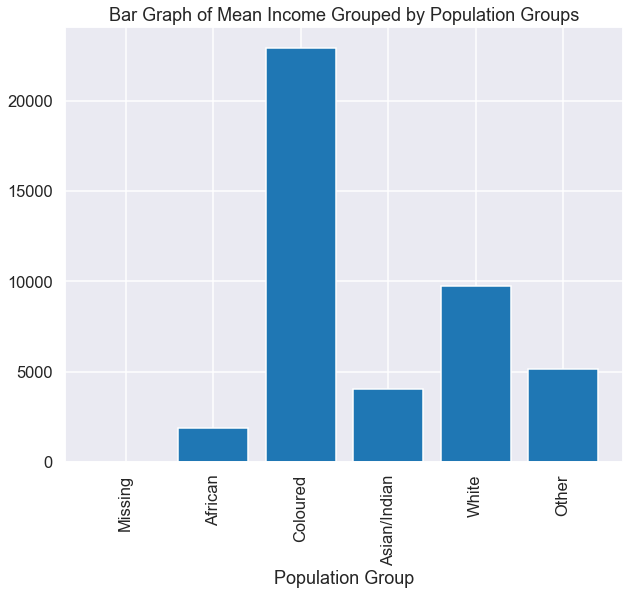

In [16]:
height = race_mean_income.values
race = ['Missing','African','Coloured','Asian/Indian','White','Other','Unknown']
plt.figure(figsize=(10,8))
plt.bar(race,height)
plt.title('Bar Graph of Mean Income Grouped by Population Groups')
plt.xlabel('Population Group')
plt.xticks(rotation = 90)
plt.show

The above graph shows the mean monthly primary gross income for each population group. It is clear from the graph that there is inequality in the distribution of income among the different races. With the white and coloured groups averaging significantly above the other three races. Even with majority of the respondents being African the race still has the lowest income average compared to the other lower income races. The graph backs up the hypothesis that there is racial inequality in the distribution of wealth in South Africa.

In [17]:
gender_mean_income = Income_Details.groupby(Personal_Details['Gender'])['Primary_Gross_Income_Month'].mean()
gender_mean_income = gender_mean_income.rename('gender_mean_income')

<function matplotlib.pyplot.show(*args, **kw)>

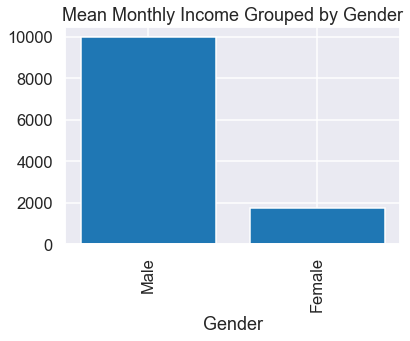

In [18]:
gender_income_vals = gender_mean_income.values
gender = ['Male','Female']
plt.bar(gender,gender_income_vals)
plt.title('Mean Monthly Income Grouped by Gender')
plt.xlabel('Gender')
plt.xticks(rotation = 90)
plt.show

In [19]:
generational_mean_income = Income_Details.groupby(Personal_Details['Year_DOB'])['Primary_Gross_Income_Month'].mean()
generational_mean_income = generational_mean_income.rename('generational_mean_income')

From the above graph it can been seen that there is a big difference between what males earn on average compared to females. With males earning over 50% more than women on average. The significant difference indicates the steep inequality of income between the two groups. Thus, it can be deduced that being born into either one of the groups can have an impact, positive (male) or bad (female), on ones ability to get an income.

In [20]:
generational_mean_income = Income_Details.groupby(Personal_Details['Year_DOB'])['Primary_Gross_Income_Month'].mean()
generational_mean_income = generational_mean_income.rename('generational_mean_income')

years = {'1907': 0, '1917': 0,'1918': 0,'1919': 0,'1920': 0,'1921': 0,'1922': 0,'1923': 0,'1924': 0,'1925': 0,'1926': 0,'1927': 0,'1928': 0,'1929': 0,'1930': 0,'1931': 0,'1932': 0,'1933': 0,'1934': 0,'1935': 0,'1936': 0,'1937': 0,'1938': 0,'1939': 0,'1940': 197.5,'1941': 235.632184,'1942': 115.841584,'1943': 267.045455,'1944': 43.018868,'1945': 336.623853,'1946': 5.433071,'1947': 66.527778,'1948': 436.809816,'1949': 293.865031,'1950': 275.242718,'1951': 1363.409091,'1952': 1640.508772,'1953': 1135.404040,'1954': 1162.108696,'1955':1733.186869 ,'1956': 3021.270758,'1957': 2945.263941,'1958': 2473.048327,'1959': 3857.876494,'1960': 3381.865052,'1961': 3026.195833,'1962': 3524.833333,'1963': 3686.730375,'1964': 3970.476923,'1965': 3632.513333,'1966': 3842.816547,'1967': 254559.073077,'1968': 4587.442073,'1969': 4468.020896,'1970': 5623.778157,'1971': 4341.016949,'1972': 3817.726190,'1973': 5644.034375,'1974': 6682.117284,'1975': 6297.888594,'1976': 3995.057229,'1977': 3820.065714,'1978': 4021.805158,'1979': 4031.560976,'1980': 5084.694517,'1981': 4227.664804,'1982': 3412.207188,'1983': 3968.880626,'1984': 3400.185547,'1985': 3602.869245,'1986': 3005.541825,'1987': 3223.199275,'1988': 3004.908289,'1989': 2924.433333,'1990': 2440.100154,'1991': 2248.087719,'1992': 2155.334443,'1993': 1389.252696,'1994': 986.856296,'1995':875.604037,'1996': 458.706048,'1997': 247.389045,'1998': 167.066860,'1999': 49.057257,'2000': 6.766917,'2001': 2.737940,'2002': 0,'2003': 0}
dob_years = pd.Series(years)
dob_years = dob_years[dob_years>0]
dob_years

1940    197.500000
1941    235.632184
1942    115.841584
1943    267.045455
1944     43.018868
           ...    
1997    247.389045
1998    167.066860
1999     49.057257
2000      6.766917
2001      2.737940
Length: 62, dtype: float64

The graph shows the average monthly pay given the year of birth of a person and it shows that people born in the 1960s to the early 1970s are the highest earners which makes sense as the people born during those years were most probably the breadwinners in the households given the period the data was collected. However, the data does not show an even distribution of the income across the years, thus indicating the lack of generational income mobility in South Africa. That said one can say that one's attainment of wealth is not critically dependent of the wealth of those prior.

<function matplotlib.pyplot.show(*args, **kw)>

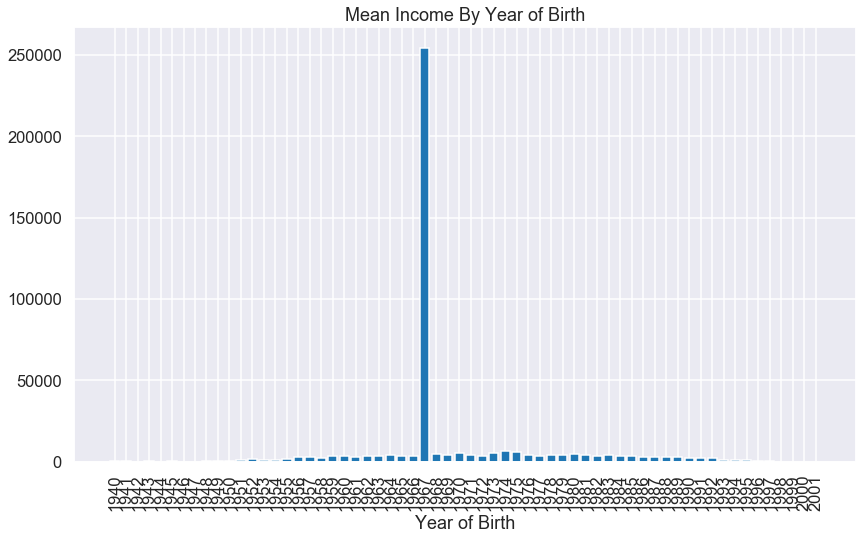

In [21]:
generation_income_vals = generational_mean_income.values
plt.figure(figsize=(14,8))
plt.bar(dob_years.index,dob_years)
plt.title('Mean Income By Year of Birth')
plt.xlabel('Year of Birth')
plt.xticks(rotation = 90)
plt.show

Hypothesis: Favorable inherited circumstances increase the chance of wealth accumulation

# 2) Marriage, in community of wealth

Examining how different stages of a relationship (living separately, cohabiting, married) affect wealth, Are married couples more wealthy than cohabiting couples? Are people who are single wealthier than divorced people,widows,widowers or separated people? Are people who have been married longer wealthier and does number of children affect wealth?
The data we will use to model the relationships in this section:

    1) Married_Cohabitation
    2) Years_Married
    3) Years_Cohabiting
    4) Current_Relationship_Status
    5) Given_Birth
    6) Birth_Count
    7) Biological_Children_Living

In [22]:
# Split by Married and single, separated, and widowed
Relationship_Stat_Mean_Income = Income_Details.groupby(Personal_Details['Current_Relationship_Status'])['Primary_Gross_Income_Month'].mean()
Relationship_Stat_Mean_Income = Relationship_Stat_Mean_Income.rename('R_Stat_Mean_Income')

In [23]:
R_Stat_Income_Vals = R_Stat_Mean_Income.values
R_Stat = ['Single','Widow/Widower','Divorced or separated','Married']
plt.bar(R_Stat,R_Stat_Income_Vals)
plt.title('Mean Monthly Income Grouped by Relationship Status')
plt.xlabel('Relationship Status')
plt.xticks(rotation = 90)
plt.show

NameError: name 'R_Stat_Mean_Income' is not defined

#### Relationship Status Analysis

From the above graph it can be seen that <> outearn <> by a factor of _x_. This is interesting because...

In [24]:
# Split by married and cohabiting
Married_Cohabit_Mean_Income = Income_Details.groupby(Personal_Details['Married_Cohabitation'])['Primary_Gross_Income_Month'].mean()
Married_Cohabit_Mean_Income = Married_Cohabit_Mean_Income.rename('Married_Cohabit_Mean_Income')

In [25]:
R_Stat_Income_Vals = R_Stat_Mean_Income.values
R_Stat = ['Cohabiting', 'Married']
plt.bar(R_Stat,R_Stat_Income_Vals)
plt.title('Mean Monthly Income Grouped by Cohabitation Status')
plt.xlabel('Cohabitation Vs Married Status')
plt.xticks(rotation = 90)
plt.show

NameError: name 'R_Stat_Mean_Income' is not defined

#### Married VS Cohabitation Status Analysis

From the above table the mean earning rates of the cohabiting couples against the married couples are basically equal.

# 3) The household's level of education determines the income bracket they can achieve and their ability to generate wealth.
 
 The variables we will use to model a persons level of education are:

    1) Mother_Degrees
    2) Mother_Highest_Tertiary
    3) Father_Highest_Tertiary (Has no intelligent records)
    4) Employment_Payment
    5) Highest_Grade_Completed
    6) Year_Highest_Grade_Completed
    7) Age_Highest_Grade_Completed
    8) Highest_Grade_Completed_Pass_Type
    9) Matric_University_Exemption
    10) Math_Highest_Grade_Completed
    11) Other_Math_Highest_Grade_Completed
    12) Tertiary_Completed
    13) Highest_Tertiary_Completed
    14) Other_Highest_Tertiary_Completed
    15) Year_Tertiary_Completed
    16) Repeated_School_Grades
    17) Currently_Enrolled_School
    18) Other_Currently_Enrolled_School
    19) Computer_Literate
    20) English_Reading_Level
    21) English_Writing_Level

In [263]:
Personal_Labels = ['Mother_Degrees','Mother_Highest_Tertiary','Father_Highest_Tertiary','Employment_Payment','Highest_Grade_Completed',
    'Highest_Grade_Completed_Pass_Type','Matric_University_Exemption',
    'Math_Highest_Grade_Completed','Other_Math_Highest_Grade_Completed','Tertiary_Completed','Highest_Tertiary_Completed',
    'Other_Highest_Tertiary_Completed', 'Repeated_School_Grades','Currently_Enrolled_School',
    'Other_Currently_Enrolled_School','Computer_Literate','English_Reading_Level','English_Writing_Level']
Income_Labels = ['Primary_Net_Income_Month', 'Main_Job_Income_Category',
    'Share_Profit_Year','Other_Bonus_Year','Extra_Income_Year','Secondary_Net_Income','Month_Take_Home_Salary', 'Rental_Income_Amount','Interest_Earnings_Amount',
    'Inheritances_Amount','Lobola_Amount', 'Gifts_Amount','Loan_Repayments_Amount','Sale_Household_Goods_Amount','Other_Income_Value', 'Household_Income_Classification',
    'Household_Income_Step_15_Years', 'Household_Income_Step_In_5_Years',
    'Household_Expected_Income_In_5_Years']

Edu_Inc_df = Personal_Details[Personal_Labels].merge( Income_Details[Income_Labels], left_index=True, right_index=True)

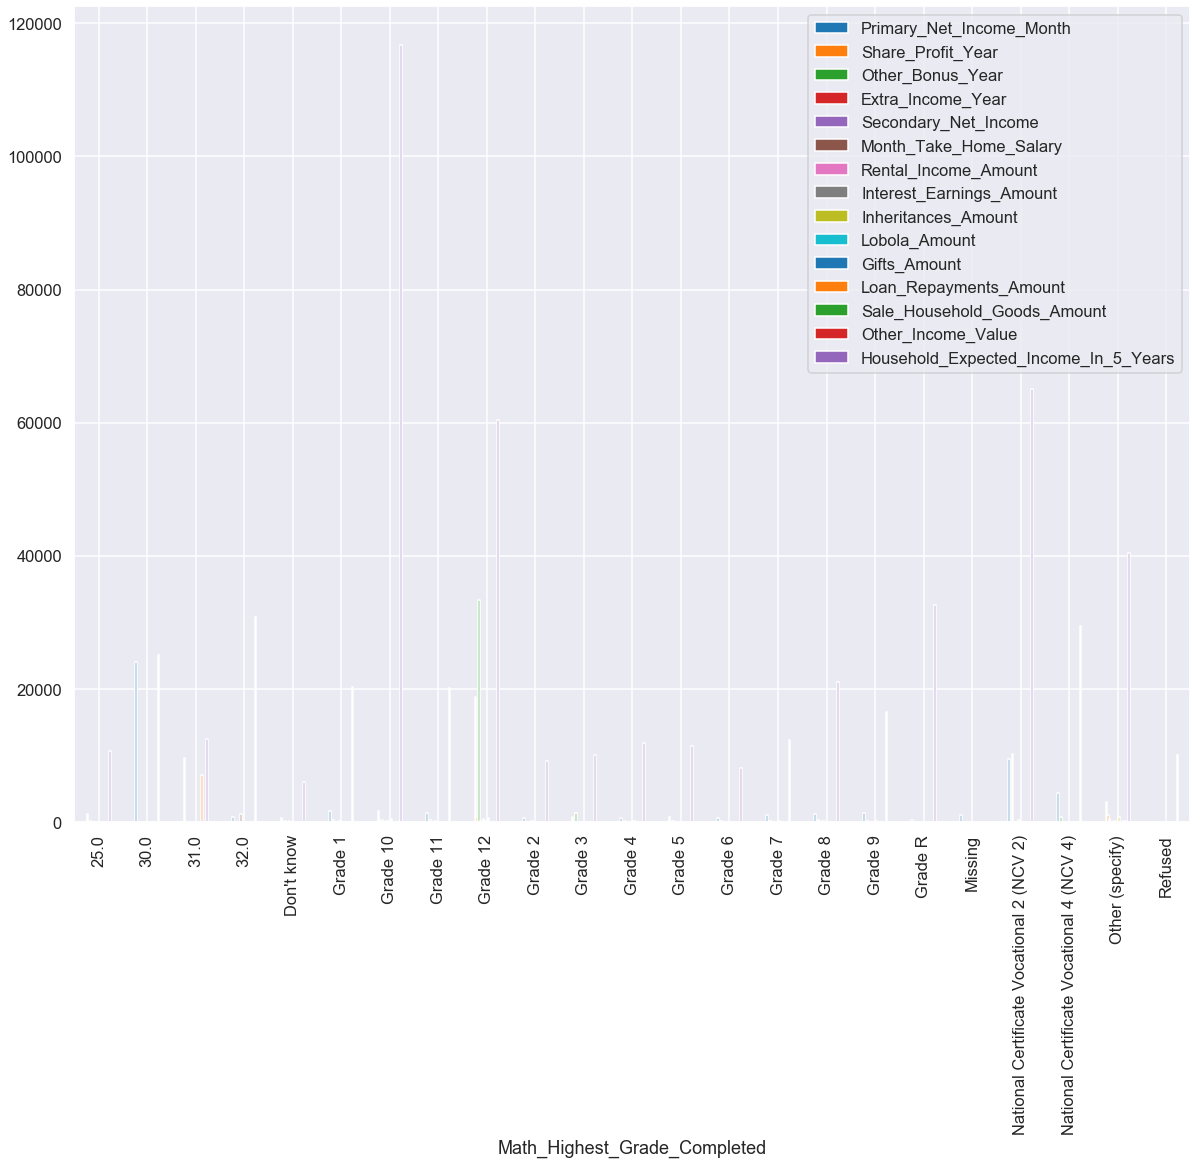

In [266]:
tips = sns.load_dataset("tips")
#sns.catplot(y="day", x="total_bill", jitter=False, data=tips)

df1 = Edu_Inc_df.groupby(['Math_Highest_Grade_Completed']).mean()
#df1 = df1.drop(columns=['Year_Highest_Grade_Completed', 'Age_Highest_Grade_Completed', 'Year_Tertiary_Completed', 'Household_Expected_Income_In_5_Years'])

df1.plot(kind='bar', figsize=(20,15))

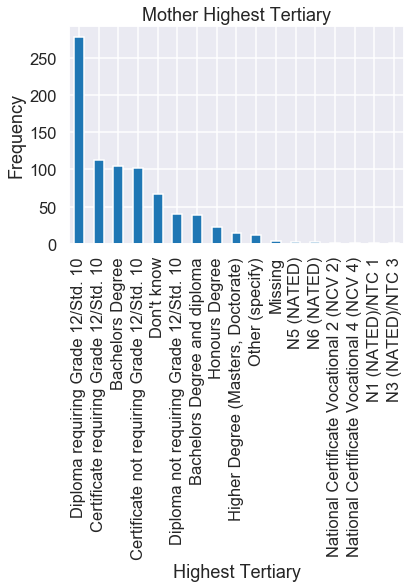

Grade 12                                     6980
Grade 11                                     3413
Grade 10                                     3143
Grade 9                                      2571
Grade 8                                      1871
No schooling                                 1726
Grade 7                                      1485
Grade 6                                       825
Grade 4                                       567
Grade 5                                       564
Grade 3                                       340
Grade 2                                       180
Grade 1                                        90
Other (specify)                                44
National Certificate Vocational 2 (NCV 2)      23
National Certificate Vocational 4 (NCV 4)      16
Don't know                                     15
Missing                                        13
N3 (NATED)/NTC 3                               13
National Certificate Vocational 3 (NCV 3)       4


In [265]:
Personal_Details['Mother_Highest_Tertiary'].value_counts().plot(kind = 'bar')
plt.ylabel('Frequency')
plt.xlabel('Highest Tertiary')
plt.title('Mother Highest Tertiary')
plt.show()

Personal_Details['Highest_Grade_Completed'].value_counts()

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()

#firstsArray = tempDF.firsts.value_counts().sort_index() / len(tempDF.firsts)
#othersArray = tempDF.others.value_counts().sort_index() / len(tempDF.others)
#colors = ['b','g']

#weights_firsts = np.ones_like(firstsArray)/len(firstsArray)
#weights_others = np.ones_like(othersArray)/len(othersArray)
#bins = hist_prglngth.max() - hist_prglngth.min()

#plt.hist([firstsArray, othersArray], bins=bins, label=['Firsts', 'Others'], color=colors)
#plt.tight_layout()
#plt.legend(loc='upper right')
#plt.show()

#print('Yes, pregnancy lengths differ by birthorder. The firsts births are usually shorter than the births that come after.')

#Asset_Details = df_filtered[['Is_Self_Employed','Net_After_Liabilities','Amount_Left_Over','Vehicle_Owner','Resale_Vehicle','Motorcycle_Owner',
 #                            'Resale_Motorcycle','Pension_Annuity','Pension_Annuity_Amount','Pension_Annuity_Category','Shares','Shares_Amount','Shares_Category',
  #                           'Bank_Account','Bank_Account_Balance','Bank_Account_Category','Possessions_Net_Value','Possessions_Net_Value_Balance']]

#asset_sum = Asset_Details.sum(axis=1)
#yes_assets = asset_sum[ Personal_Details['Mother_Degrees'][Personal_Details['Mother_Degrees'] == 'Yes'].index ]
#no_assets = asset_sum[ Personal_Details['Mother_Degrees'][Personal_Details['Mother_Degrees'] == 'No'].index ]



#sns.set()
#sns.set_palette("Reds", n_colors=2)
#fig, ax = plt.subplots(figsize=(15,10))
#L_All.groupby(["Year","Gender"]).mean()['Salary'].unstack().plot(ax=ax) # group data by year and gender
# rename labels in legend to names rather than integers
#plt.legend(['Mother_Degrees_Yes','Mother_Degrees_No'],fancybox=True,fontsize=15)
#plt.title('Asset Accumulation of Mothers with Degrees',fontsize=20)
#plt.xticks(np.arange(1, 810, 1))  
#plt.xlabel('Number of People',fontsize=20)
#plt.ylabel('Value',fontsize=20)


#sns.catplot(x="Number of People", y="Value", hue="Mother Degree", kind="swarm", data=pd.DataFrame({ "Yes" : yes_assets, "No" : no_assets }))
#sns.catplot(x='Yes', y='No', 
 #           data=pd.DataFrame({ "Yes" : yes_assets, "No" : no_assets }),
  #          kind='box',
   #         height=4, aspect=1.5)
#plotting the highest grade achieved data

#fig = plt.figure(figsize=(9,7))
#ax = fig.add_axes([0,0,1,1])
#ax.hist(pd.DataFrame({ "Yes" : yes_assets, "No" : no_assets }), width = 0.45, bins = 24)

#ax.set_ylabel('No. of Respondents')
#ax.set_xlabel('Grade')
#ax.set_title('Highest Grade Accomplished by Respondent')
#plt.xticks(rotation = 90)
 

#plt.show()